In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from utils.process import Assemble
assemble = Assemble()

ModuleNotFoundError: No module named 'utils'

In [ ]:
from utils.process import Categorize
categorize = Categorize()

In [ ]:
from utils.process import Generate
generate = Generate()

In [3]:
df = pd.read_csv('./data/Clean_Dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/Clean_Dataset.csv'

In [6]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [93]:
df = df.drop('Unnamed: 0', axis=1)

In [94]:
df.corr()

,duration,days_left,price,class_code
duration,1.000000,-0.039157,0.204222,0.138710
days_left,-0.039157,1.000000,-0.091949,-0.013039
price,0.204222,-0.091949,1.000000,0.937860
class_code,0.138710,-0.013039,0.937860,1.000000


In [95]:
df.corr()['price']

duration      0.204222
days_left    -0.091949
price         1.000000
class_code    0.937860
Name: price, dtype: float64

In [96]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'duration_category', 'days_left_category', 'path',
       'path_group', 'class_code', 'time'],
      dtype='object')

In [97]:
df.dtypes

airline                object
flight                 object
source_city            object
departure_time         object
stops                  object
arrival_time           object
destination_city       object
class                  object
duration              float64
days_left               int64
price                   int64
duration_category      object
days_left_category     object
path                   object
path_group             object
class_code              int64
time                   object
dtype: object

# Categorical Data Analysis

In [98]:
df_object = df.select_dtypes(include='object').drop('flight',axis=1)

In [99]:
for column in df_object:
    print(len(df_object[column].unique()))

6
6
6
3
6
6
2
4
5
30
3
36


In [ ]:
class EDA():
    
    
    def numerical_numerical():
        pass
    
    def categorical_numerical()



ValueError: num must be 1 <= num <= 8, not 9

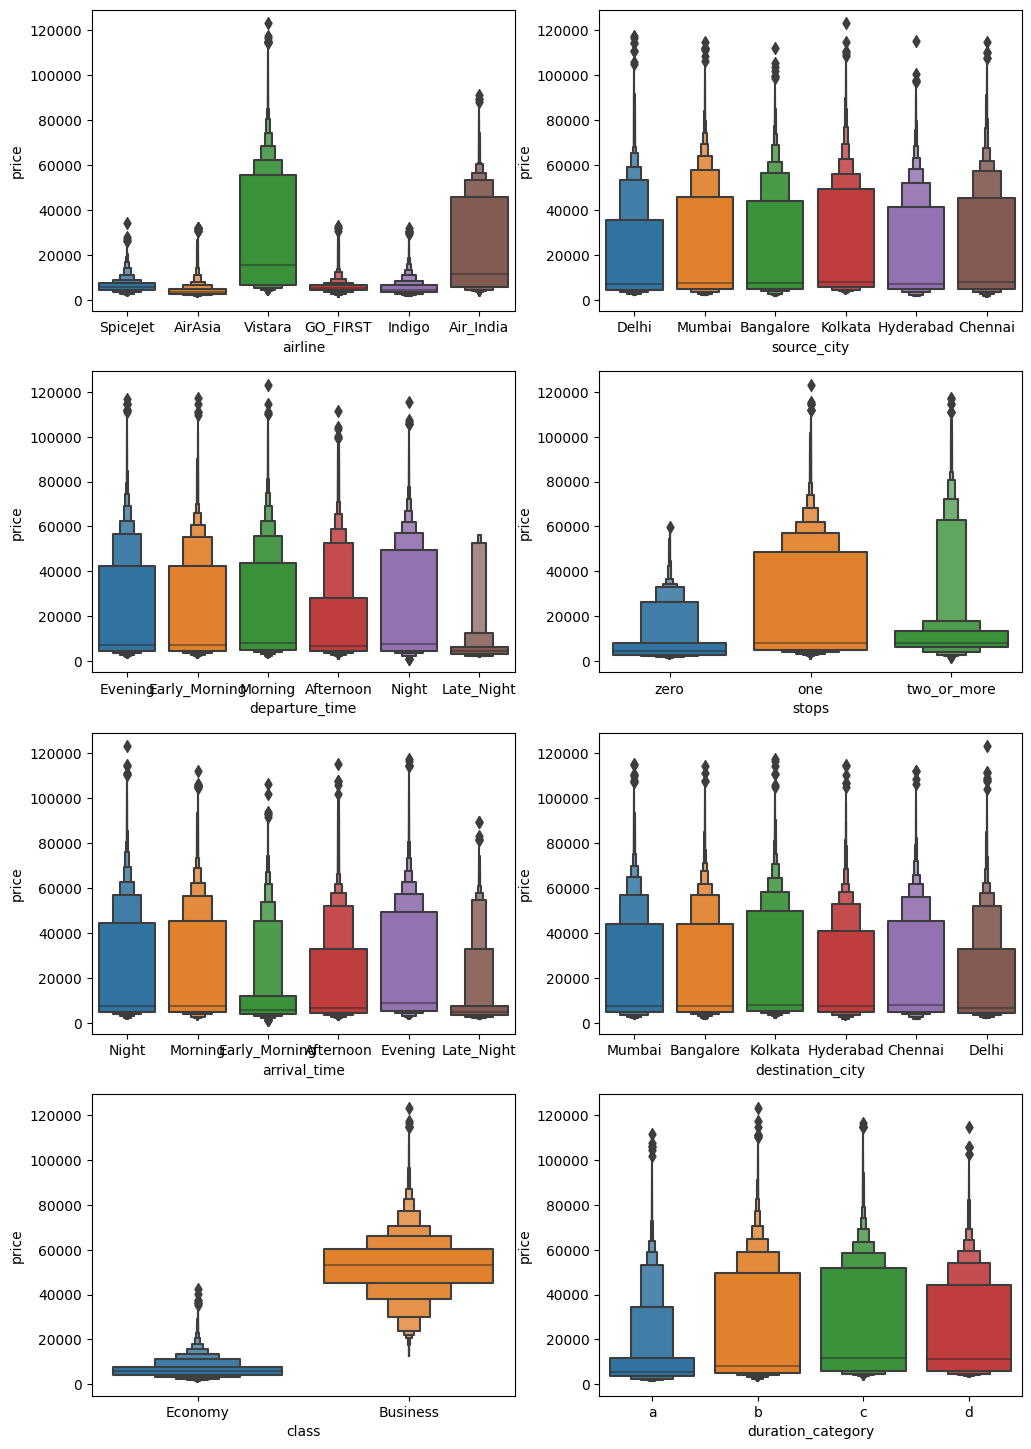

In [105]:
df_object = df.select_dtypes(include='object').drop('flight',axis=1)
plt.figure(figsize=(12,18))
for index, column in enumerate(df_object):
    plt.subplot(4,2,index+1)
    sns.boxenplot(data=df, x=column, y='price')

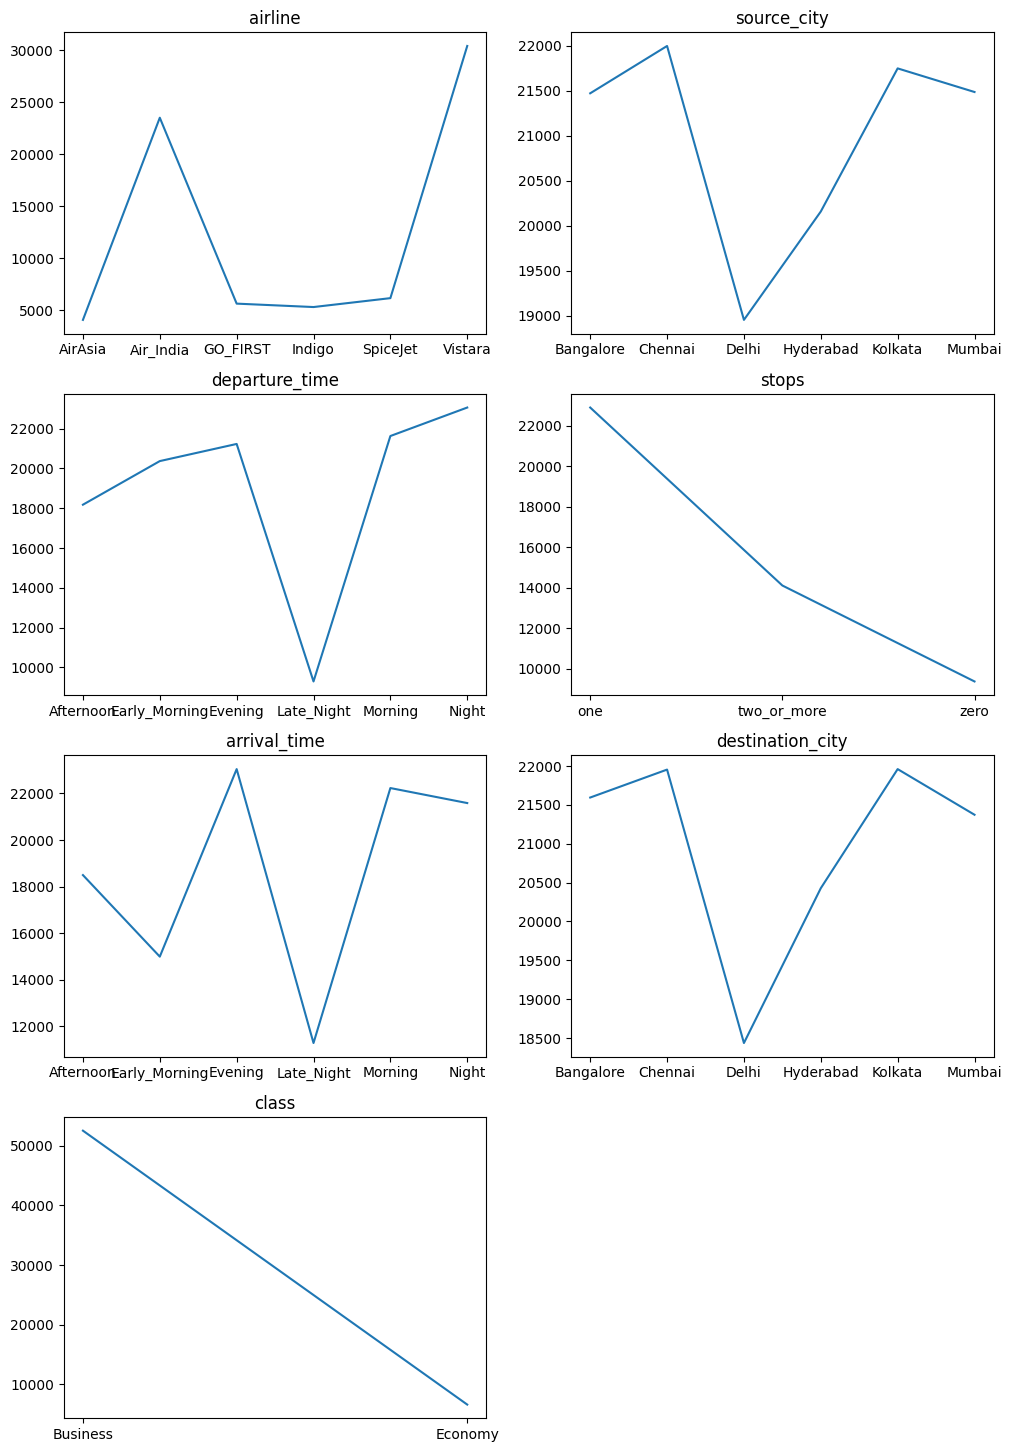

In [16]:
plt.figure(figsize=(12,18))
df_plot = pd.concat([df_object, df.price], axis=1)
for index, column in enumerate(df_object):
    plt.subplot(4,2,index+1)
    group = df_plot.groupby(column).mean()['price']
    plt.plot(group.index, group.values)
    plt.title(column)

## Duration Categorization

In [17]:
df.duration.max(), df.duration.min(), df.duration.mean(), df.duration.median()

(49.83, 0.83, 12.221020812717917, 11.25)

<AxesSubplot:xlabel='duration', ylabel='Density'>

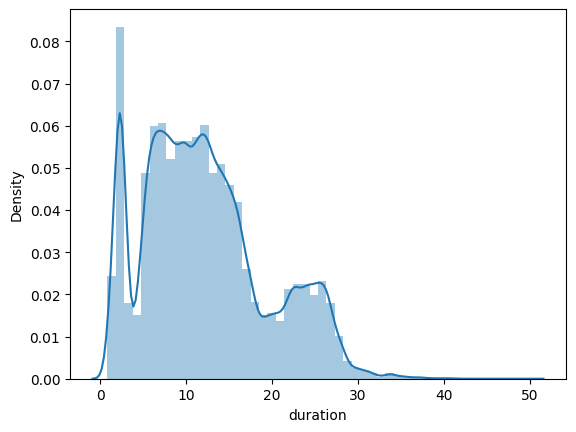

In [18]:
sns.distplot(df.duration)

In [106]:
duration_ranges = generate.generate_numerical_ranges(df.duration, [5,18,28])
duration_ranges

[range(0, 5), range(5, 18), range(18, 28), range(28, 74)]

In [107]:
duration_dict = categorize.categorize_numerical_variable(df.duration, duration_ranges)

In [108]:
df['duration_category']=df['duration'].map(duration_dict)

<AxesSubplot:xlabel='duration_category', ylabel='count'>

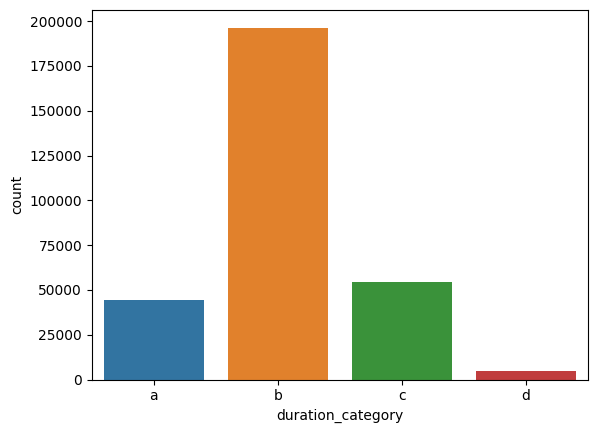

In [114]:
sns.countplot(df.duration_category)

<AxesSubplot:xlabel='duration_category', ylabel='price'>

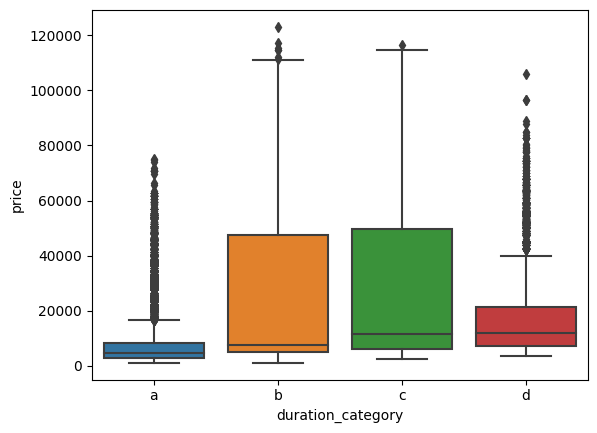

In [124]:
sns.boxplot(x='duration_category', y='price',data=df)

In [130]:
duration_d = df[df['duration_category'] == 'd']
duration_a = df[df['duration_category'] == 'a']

In [122]:
duration_d.airline.value_counts()

Air_India    3367
Vistara      1551
Name: airline, dtype: int64

In [126]:
duration_d['class'].value_counts()

Economy     3774
Business    1144
Name: class, dtype: int64

In [129]:
duration_d[duration_d['price'] > 35000]['class'].value_counts()

Business    1143
Name: class, dtype: int64

In [132]:
duration_a.airline.value_counts()

Indigo       15121
Vistara      11661
Air_India     7528
GO_FIRST      4067
AirAsia       2922
SpiceJet      2897
Name: airline, dtype: int64

In [133]:
duration_a['class'].value_counts()

Economy     35091
Business     9105
Name: class, dtype: int64

In [148]:
duration_a[duration_a['price'] >= 18000]['class'].value_counts()

Business    8647
Economy       94
Name: class, dtype: int64

In [165]:
oe = duration_a[duration_a['price'] >= 18000]
oeco = oe[oe['class']=='Economy']
oeco

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code,time
241,Air_India,AI-406,Delhi,Morning,one,Afternoon,Mumbai,Economy,4.83,2,20445,a,b,Delhi Mumbai,a,0,Morning Afternoon
387,Air_India,AI-406,Delhi,Morning,one,Afternoon,Mumbai,Economy,4.83,3,22965,a,b,Delhi Mumbai,a,0,Morning Afternoon
561,Air_India,AI-406,Delhi,Morning,one,Afternoon,Mumbai,Economy,4.83,4,21390,a,b,Delhi Mumbai,a,0,Morning Afternoon
1458,Air_India,AI-471,Delhi,Afternoon,one,Evening,Mumbai,Economy,4.58,9,20865,a,c,Delhi Mumbai,a,0,Afternoon Evening
1637,Air_India,AI-406,Delhi,Morning,one,Afternoon,Mumbai,Economy,4.83,10,21390,a,d,Delhi Mumbai,a,0,Morning Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180497,Air_India,AI-539,Chennai,Evening,zero,Evening,Delhi,Economy,2.83,1,20268,a,a,Chennai Delhi,a,0,Evening Evening
181315,Air_India,AI-538,Chennai,Night,zero,Night,Delhi,Economy,2.83,9,20268,a,c,Chennai Delhi,a,0,Night Night
185678,Indigo,6E-2752,Chennai,Evening,zero,Night,Delhi,Economy,2.75,37,18038,a,e,Chennai Delhi,a,0,Evening Night
186632,Indigo,6E-5002,Chennai,Morning,zero,Afternoon,Delhi,Economy,2.42,43,18563,a,e,Chennai Delhi,a,0,Morning Afternoon


In [147]:
oeco['time'].value_counts()

Morning Afternoon        42
Afternoon Evening        15
Evening Night            14
Early_Morning Morning     7
Evening Evening           7
Afternoon Night           6
Night Night               2
Afternoon Afternoon       1
Name: time, dtype: int64

In [154]:
od = duration_a[duration_a['price'] < 18000]
odeco = od[od['class']=='Economy']
odeco.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code,time
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,a,a,Delhi Mumbai,a,0,Evening Night
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,a,a,Delhi Mumbai,a,0,Early_Morning Morning
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,a,a,Delhi Mumbai,a,0,Early_Morning Early_Morning
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,a,a,Delhi Mumbai,a,0,Morning Afternoon
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,a,a,Delhi Mumbai,a,0,Morning Morning


<AxesSubplot:xlabel='price', ylabel='Density'>

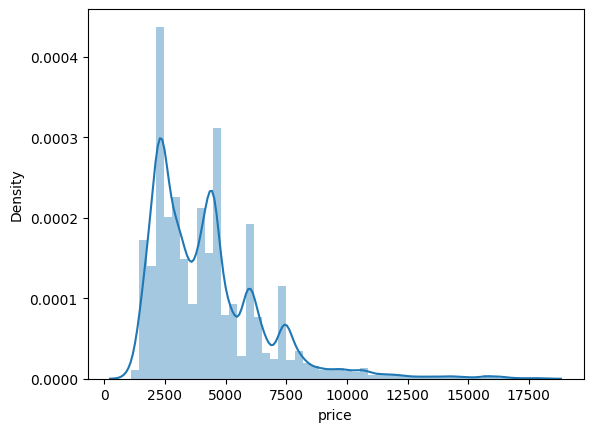

In [167]:
sns.distplot(odeco.price)

In [155]:
odeco['time'].value_counts()

Evening Night                  6393
Early_Morning Morning          5892
Afternoon Evening              3908
Morning Afternoon              3898
Night Night                    3370
Evening Evening                2733
Morning Morning                2310
Night Late_Night               2124
Early_Morning Early_Morning    1816
Afternoon Afternoon            1531
Late_Night Early_Morning        262
Evening Late_Night              228
Afternoon Night                 158
Late_Night Late_Night           137
Early_Morning Afternoon         136
Morning Evening                 101
Name: time, dtype: int64

In [164]:
oeco.groupby('time')['price'].mean().sort_values(ascending=False)

time
Afternoon Night          27231.333333
Afternoon Afternoon      21058.000000
Morning Afternoon        20910.357143
Afternoon Evening        20338.733333
Evening Night            20280.928571
Evening Evening          19689.714286
Early_Morning Morning    19255.142857
Night Night              19149.000000
Name: price, dtype: float64

In [170]:
odeco.groupby('time')['price'].median().sort_values(ascending=False)

time
Morning Evening                5337.0
Afternoon Night                4772.0
Early_Morning Afternoon        4654.5
Morning Afternoon              4499.0
Late_Night Late_Night          4498.0
Afternoon Evening              4145.0
Evening Night                  4111.0
Early_Morning Morning          4000.0
Evening Late_Night             3869.0
Night Late_Night               3863.0
Late_Night Early_Morning       3393.0
Evening Evening                3348.0
Night Night                    3096.0
Morning Morning                3020.0
Early_Morning Early_Morning    3000.0
Afternoon Afternoon            2901.0
Name: price, dtype: float64

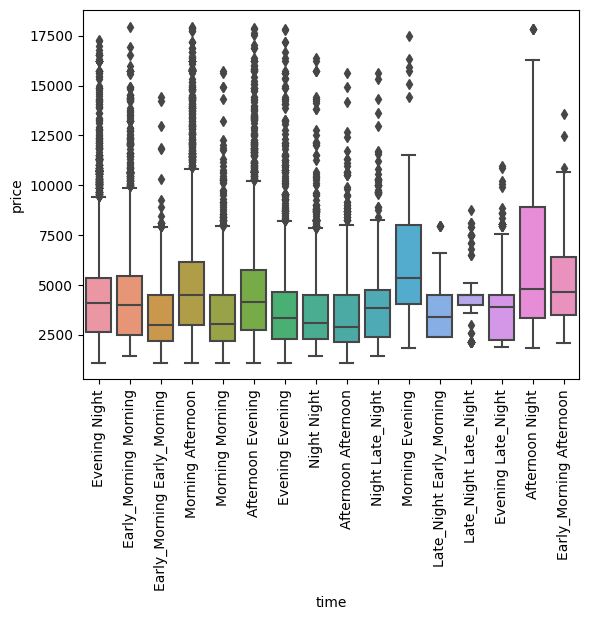

In [173]:
sns.boxplot(x='time',y='price',data=odeco)
plt.xticks(rotation=90);

In [169]:
odeco.groupby('time')['price'].mean().sort_values(ascending=False)

time
Morning Evening                6228.702970
Afternoon Night                6211.727848
Early_Morning Afternoon        5552.529412
Morning Afternoon              5085.459210
Afternoon Evening              4654.222876
Evening Night                  4468.217895
Early_Morning Morning          4340.048540
Evening Late_Night             4319.013158
Late_Night Late_Night          4288.291971
Night Late_Night               4102.612524
Evening Evening                3924.095134
Night Night                    3787.507122
Late_Night Early_Morning       3691.576336
Morning Morning                3662.175325
Afternoon Afternoon            3479.519922
Early_Morning Early_Morning    3479.426211
Name: price, dtype: float64

In [161]:
df.groupby('time')['price'].mean().sort_values(ascending=False)

time
Night Evening                  31425.824194
Early_Morning Late_Night       29638.037500
Late_Night Night               29439.811321
Evening Morning                28326.216482
Night Afternoon                28115.362126
Morning Night                  26827.897551
Afternoon Morning              26056.580994
Early_Morning Night            25792.007764
Night Morning                  25573.642137
Evening Afternoon              25569.672277
Early_Morning Evening          24804.077441
Evening Evening                24612.547643
Morning Late_Night             23624.505755
Morning Early_Morning          22625.786578
Morning Evening                21636.529952
Late_Night Evening             21217.106383
Afternoon Early_Morning        21159.511401
Afternoon Night                19097.798757
Late_Night Afternoon           18520.684932
Evening Early_Morning          18175.929529
Night Night                    17817.956009
Morning Morning                17548.738563
Early_Morning Afternoon    

In [208]:
path_duration = df[(df['path_group']=='a') & (df['duration_category']=='a')]
path_duration.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code,time
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,a,a,Delhi Mumbai,a,0,Evening Night
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,a,a,Delhi Mumbai,a,0,Early_Morning Morning
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,a,a,Delhi Mumbai,a,0,Early_Morning Early_Morning
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,a,a,Delhi Mumbai,a,0,Morning Afternoon
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,a,a,Delhi Mumbai,a,0,Morning Morning


In [207]:
ss = path_duration[(path_duration['days_left']==13) & (path_duration['class']=='Economy')]
ss

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code,time
2077,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,13,5953,a,d,Delhi Mumbai,a,0,Evening Night
2078,SpiceJet,SG-1089,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.25,13,5953,a,d,Delhi Mumbai,a,0,Early_Morning Morning
2079,SpiceJet,SG-1061,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,13,5953,a,d,Delhi Mumbai,a,0,Early_Morning Morning
2080,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,13,5953,a,d,Delhi Mumbai,a,0,Early_Morning Morning
2081,SpiceJet,SG-1063,Delhi,Evening,zero,Night,Mumbai,Economy,2.33,13,5953,a,d,Delhi Mumbai,a,0,Evening Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181844,Indigo,6E-613,Chennai,Evening,zero,Night,Delhi,Economy,2.75,13,8192,a,d,Chennai Delhi,a,0,Evening Night
181845,Air_India,AI-440,Chennai,Early_Morning,zero,Morning,Delhi,Economy,2.67,13,8193,a,d,Chennai Delhi,a,0,Early_Morning Morning
181848,Air_India,AI-539,Chennai,Evening,zero,Evening,Delhi,Economy,2.83,13,8718,a,d,Chennai Delhi,a,0,Evening Evening
181849,Indigo,6E-6219,Chennai,Morning,one,Afternoon,Delhi,Economy,4.92,13,9169,a,d,Chennai Delhi,a,0,Morning Afternoon


# EDA

Text(0.5, 1.0, 'Economy')

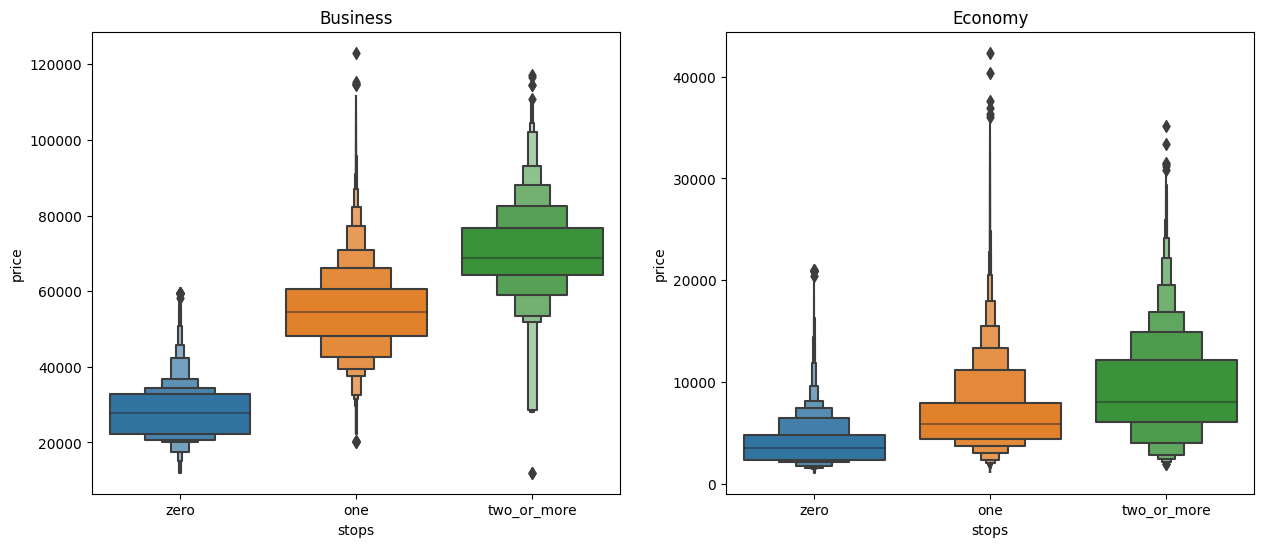

In [512]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxenplot(data = dfb, x  ='stops', y = 'price')
plt.title('Business')
plt.subplot(1,2,2)
sns.boxenplot(data = dfe, x  ='stops', y = 'price')
plt.title('Economy')

# Economy

<AxesSubplot:xlabel='days_left', ylabel='Density'>

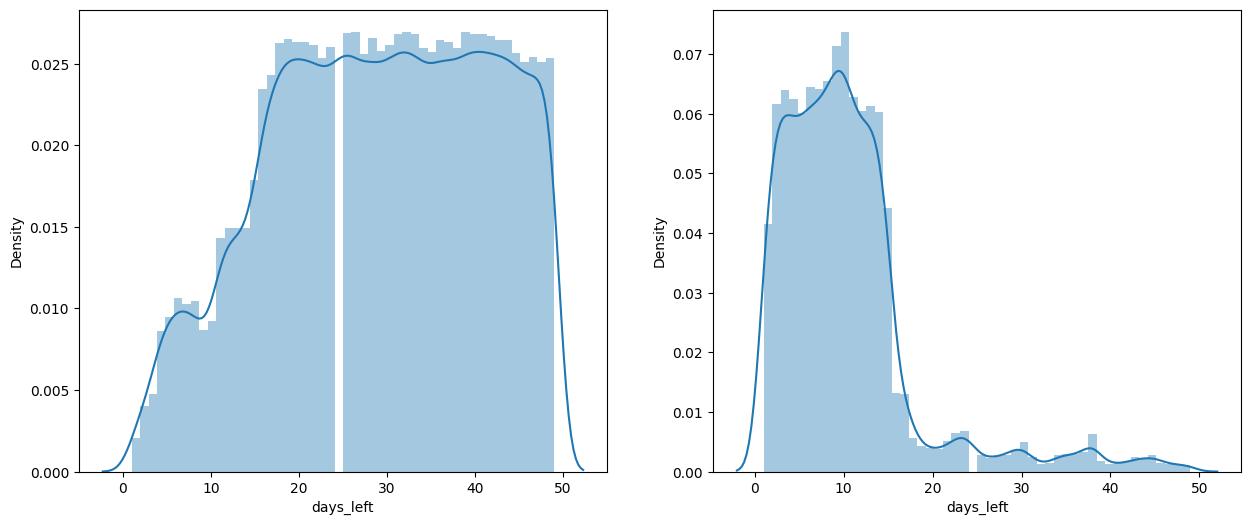

In [538]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(dfe[dfe['price'] < 10000]['days_left'])
plt.subplot(1,2,2)
sns.distplot(dfe[dfe['price'] > 10000]['days_left'])

# Business

<AxesSubplot:xlabel='days_left', ylabel='Density'>

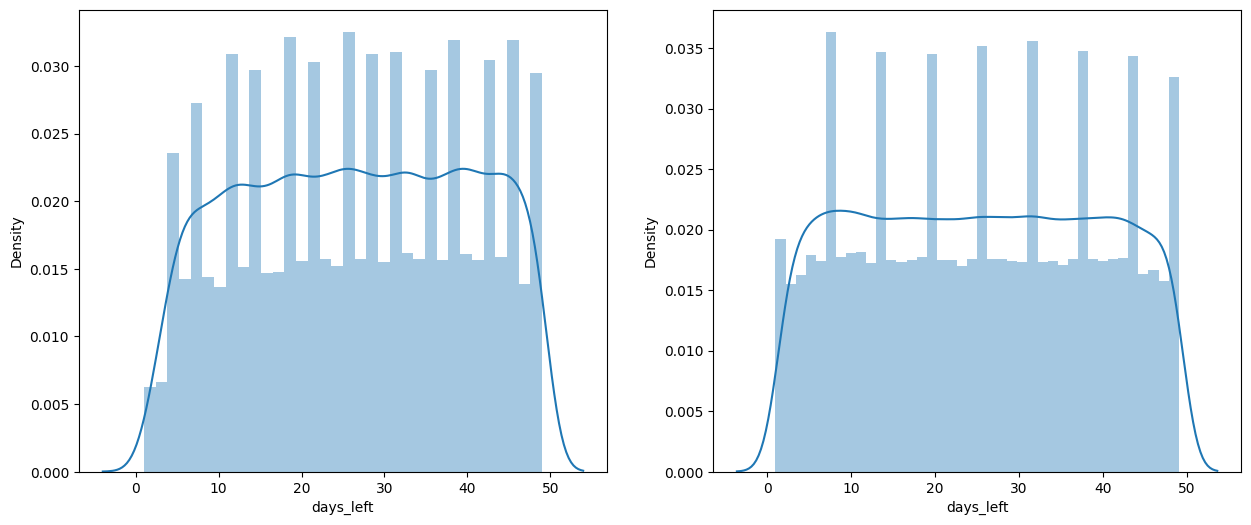

In [544]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(dfb[dfb['price'] < 50000]['days_left'])
plt.subplot(1,2,2)
sns.distplot(dfb[dfb['price'] > 50000]['days_left'])

In [521]:
dfb[dfb['stops']=='two_or_more'].days_left_category.value_counts()

e    675
d    172
b    122
c    103
a     11
Name: days_left_category, dtype: int64

In [522]:
dfb[dfb['stops']=='one'].days_left_category.value_counts()

e    57174
d    14186
c     8735
b     3981
a      226
Name: days_left_category, dtype: int64

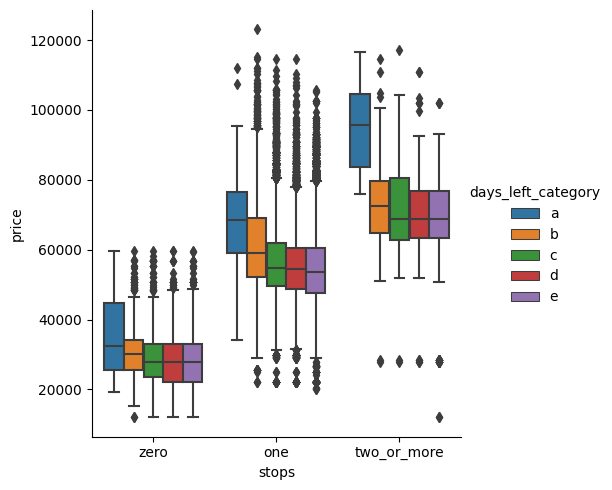

In [516]:
sns.catplot(data = dfb, x  ='stops', y = 'price',hue='days_left_category',kind='box')

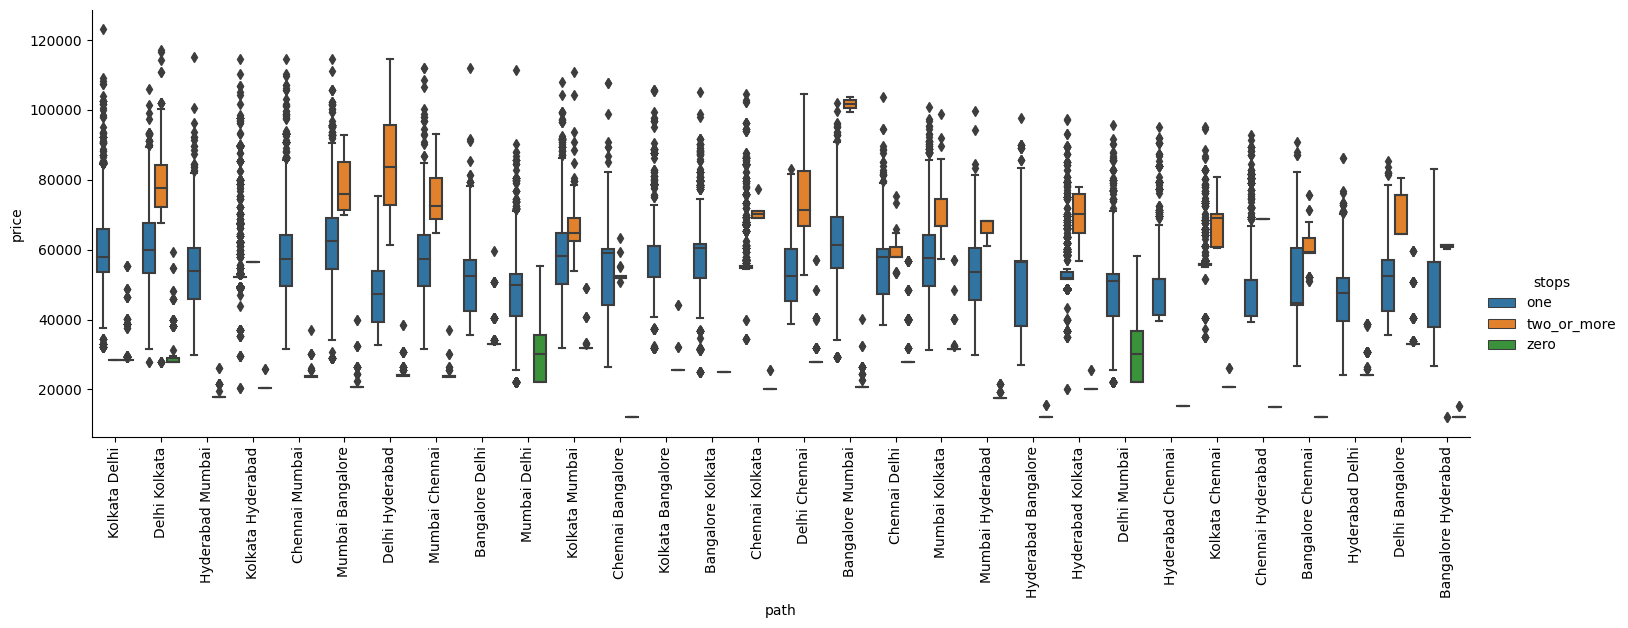

In [497]:
sns.catplot(data=dfb.sort_values(by='price',ascending=False), x='path',y='price',hue='stops',kind='box',aspect=3)
plt.xticks(rotation=90);

In [505]:
dfb[(dfb['path']=='Kolkata Delhi') & (dfb['stops']=='two_or_more')]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code
261381,261381,Air_India,AI-424,Kolkata,Afternoon,two_or_more,Night,Delhi,Business,7.42,4,28510,a,b,Kolkata Delhi,a,1
261503,261503,Air_India,AI-424,Kolkata,Afternoon,two_or_more,Night,Delhi,Business,7.42,6,28510,a,c,Kolkata Delhi,a,1
261797,261797,Air_India,AI-424,Kolkata,Afternoon,two_or_more,Night,Delhi,Business,7.42,11,28510,a,d,Kolkata Delhi,a,1
261915,261915,Air_India,AI-424,Kolkata,Afternoon,two_or_more,Night,Delhi,Business,7.42,13,28510,a,d,Kolkata Delhi,a,1
262201,262201,Air_India,AI-424,Kolkata,Afternoon,two_or_more,Night,Delhi,Business,7.42,18,28510,a,e,Kolkata Delhi,a,1
262314,262314,Air_India,AI-424,Kolkata,Afternoon,two_or_more,Night,Delhi,Business,7.42,20,28510,a,e,Kolkata Delhi,a,1
262588,262588,Air_India,AI-424,Kolkata,Afternoon,two_or_more,Night,Delhi,Business,7.42,25,28510,a,e,Kolkata Delhi,a,1
262705,262705,Air_India,AI-424,Kolkata,Afternoon,two_or_more,Night,Delhi,Business,7.42,27,28510,a,e,Kolkata Delhi,a,1
262981,262981,Air_India,AI-424,Kolkata,Afternoon,two_or_more,Night,Delhi,Business,7.42,32,28510,a,e,Kolkata Delhi,a,1
263095,263095,Air_India,AI-424,Kolkata,Afternoon,two_or_more,Night,Delhi,Business,7.42,34,28510,a,e,Kolkata Delhi,a,1


In [507]:
dfb[(dfb['path']=='Kolkata Delhi') & (dfb['stops']=='one')& (dfb['flight']=='UK-774')]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code
261281,261281,Vistara,UK-774,Kolkata,Night,one,Morning,Delhi,Business,12.50,1,70879,b,a,Kolkata Delhi,a,1
261282,261282,Vistara,UK-774,Kolkata,Night,one,Afternoon,Delhi,Business,17.50,1,70991,c,a,Kolkata Delhi,a,1
261283,261283,Vistara,UK-774,Kolkata,Night,one,Morning,Delhi,Business,14.42,1,73231,b,a,Kolkata Delhi,a,1
261284,261284,Vistara,UK-774,Kolkata,Night,one,Night,Delhi,Business,25.33,1,73231,d,a,Kolkata Delhi,a,1
261285,261285,Vistara,UK-774,Kolkata,Night,one,Evening,Delhi,Business,20.17,1,75393,c,a,Kolkata Delhi,a,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263959,263959,Vistara,UK-774,Kolkata,Night,one,Afternoon,Delhi,Business,17.50,49,66063,c,e,Kolkata Delhi,a,1
263960,263960,Vistara,UK-774,Kolkata,Night,one,Evening,Delhi,Business,20.33,49,66063,c,e,Kolkata Delhi,a,1
263961,263961,Vistara,UK-774,Kolkata,Night,one,Evening,Delhi,Business,21.50,49,66063,c,e,Kolkata Delhi,a,1
263964,263964,Vistara,UK-774,Kolkata,Night,one,Morning,Delhi,Business,13.08,49,68303,b,e,Kolkata Delhi,a,1


In [504]:
dfb[(dfb['path']=='Kolkata Delhi') & (dfb['stops']=='zero') & (dfb['flight']=='UK-738')]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code
261294,261294,Vistara,UK-738,Kolkata,Evening,zero,Night,Delhi,Business,2.42,2,46430,a,b,Kolkata Delhi,a,1
261380,261380,Vistara,UK-738,Kolkata,Evening,zero,Night,Delhi,Business,2.42,4,28510,a,b,Kolkata Delhi,a,1
261467,261467,Vistara,UK-738,Kolkata,Evening,zero,Night,Delhi,Business,2.42,5,55278,a,c,Kolkata Delhi,a,1
261502,261502,Vistara,UK-738,Kolkata,Evening,zero,Night,Delhi,Business,2.42,6,28510,a,c,Kolkata Delhi,a,1
261562,261562,Vistara,UK-738,Kolkata,Evening,zero,Night,Delhi,Business,2.42,7,28510,a,c,Kolkata Delhi,a,1
261621,261621,Vistara,UK-738,Kolkata,Evening,zero,Night,Delhi,Business,2.42,8,28510,a,c,Kolkata Delhi,a,1
261676,261676,Vistara,UK-738,Kolkata,Evening,zero,Night,Delhi,Business,2.42,9,28510,a,c,Kolkata Delhi,a,1
261744,261744,Vistara,UK-738,Kolkata,Evening,zero,Night,Delhi,Business,2.42,10,38590,a,d,Kolkata Delhi,a,1
261796,261796,Vistara,UK-738,Kolkata,Evening,zero,Night,Delhi,Business,2.42,11,28510,a,d,Kolkata Delhi,a,1
261856,261856,Vistara,UK-738,Kolkata,Evening,zero,Night,Delhi,Business,2.42,12,28510,a,d,Kolkata Delhi,a,1


<AxesSubplot:xlabel='duration', ylabel='price'>

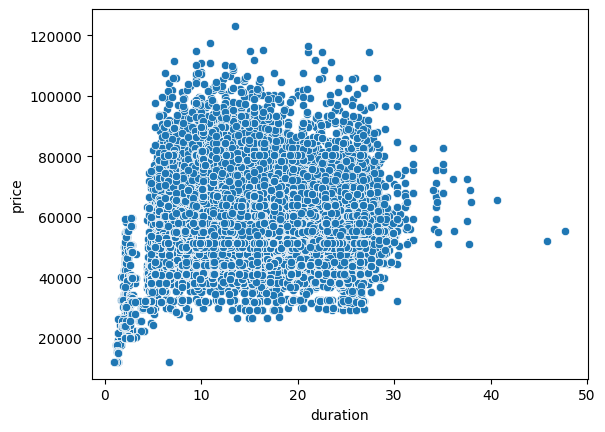

In [488]:
sns.scatterplot(data = dfb, x  ='duration', y = 'price')

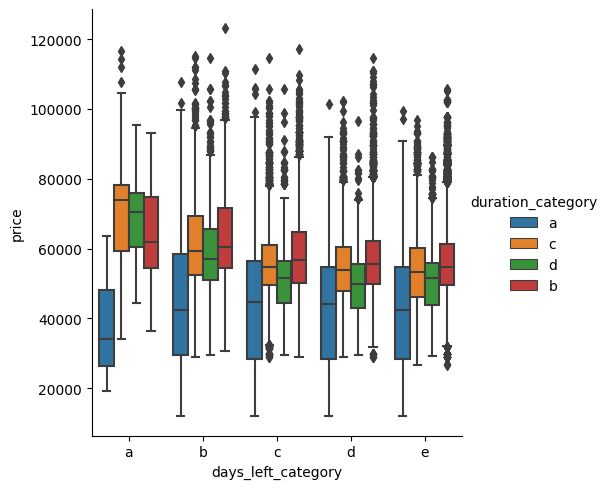

In [480]:
sns.catplot(x='days_left_category',y='price',hue='duration_category',data=dfb,kind='box')

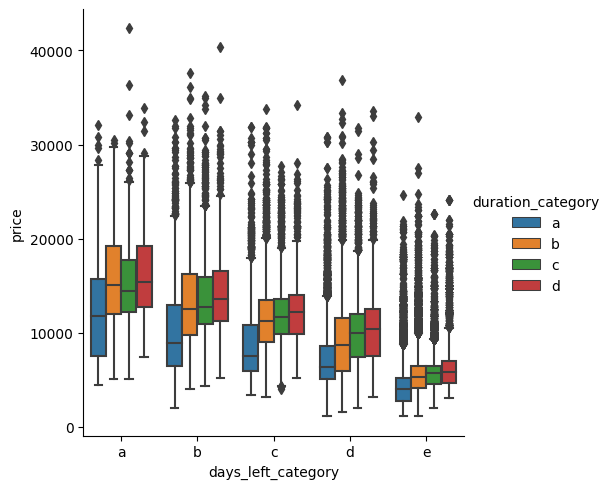

In [481]:
sns.catplot(x='days_left_category',y='price',hue='duration_category',data=dfe,kind='box')

In [211]:
ss[ss['path']=='Delhi Mumbai']

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code,time
2077,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,13,5953,a,d,Delhi Mumbai,a,0,Evening Night
2078,SpiceJet,SG-1089,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.25,13,5953,a,d,Delhi Mumbai,a,0,Early_Morning Morning
2079,SpiceJet,SG-1061,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,13,5953,a,d,Delhi Mumbai,a,0,Early_Morning Morning
2080,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,13,5953,a,d,Delhi Mumbai,a,0,Early_Morning Morning
2081,SpiceJet,SG-1063,Delhi,Evening,zero,Night,Mumbai,Economy,2.33,13,5953,a,d,Delhi Mumbai,a,0,Evening Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,Indigo,6E-2193,Delhi,Afternoon,one,Evening,Mumbai,Economy,3.83,13,7420,a,d,Delhi Mumbai,a,0,Afternoon Evening
2188,Indigo,6E-181,Delhi,Early_Morning,one,Morning,Mumbai,Economy,4.83,13,8396,a,d,Delhi Mumbai,a,0,Early_Morning Morning
2192,GO_FIRST,G8-717,Delhi,Evening,one,Night,Mumbai,Economy,4.75,13,8869,a,d,Delhi Mumbai,a,0,Evening Night
2199,Vistara,UK-637,Delhi,Evening,one,Night,Mumbai,Economy,4.42,13,9420,a,d,Delhi Mumbai,a,0,Evening Night


In [198]:
path_duration[path_duration['class']=='Economy']

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code,time
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,a,a,Delhi Mumbai,a,0,Evening Night
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,a,a,Delhi Mumbai,a,0,Early_Morning Morning
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,a,a,Delhi Mumbai,a,0,Early_Morning Early_Morning
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,a,a,Delhi Mumbai,a,0,Morning Afternoon
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,a,a,Delhi Mumbai,a,0,Morning Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187428,Indigo,6E-613,Chennai,Evening,zero,Night,Delhi,Economy,2.83,49,3191,a,e,Chennai Delhi,a,0,Evening Night
187429,Indigo,6E-6567,Chennai,Afternoon,zero,Evening,Delhi,Economy,2.92,49,3191,a,e,Chennai Delhi,a,0,Afternoon Evening
187499,Vistara,UK-822,Chennai,Morning,one,Afternoon,Delhi,Economy,4.75,49,5206,a,e,Chennai Delhi,a,0,Morning Afternoon
187514,GO_FIRST,G8-451,Chennai,Afternoon,one,Evening,Delhi,Economy,4.92,49,4876,a,e,Chennai Delhi,a,0,Afternoon Evening


In [236]:
common = {'Economy':{},'Business':{}}

In [240]:
common['Economy']['days_left_category'] = {}
for day in dfe.days_left_category.unique():
    dfe_temp = dfe[dfe['days_left_category']==day]
    common['Economy']['days_left_category'][day] = dfe_temp
common['Economy']['duration_category'] = {}
for duration in dfe.duration_category.unique():
    dfe_temp = dfe[dfe['duration_category']==duration]
    common['Economy']['duration_category'][duration] = dfe_temp

In [246]:
common['Business']['days_left_category'] = {}
for day in dfb.days_left_category.unique():
    dfb_temp = dfb[dfb['days_left_category']==day]
    common['Business']['days_left_category'][day] = dfb_temp
common['Business']['duration_category'] = {}
for duration in dfb.duration_category.unique():
    dfb_temp = dfb[dfb['duration_category']==duration]
    common['Business']['duration_category'][duration] = dfb_temp

In [264]:
g = common['Economy']['days_left_category']['b'] 

In [274]:
dfb.corr()

,Unnamed: 0,duration,days_left,price,class_code
Unnamed: 0,1.000000,0.118288,0.044887,0.123229,NaN
duration,0.118288,1.000000,-0.026585,0.242731,NaN
days_left,0.044887,-0.026585,1.000000,-0.091289,NaN
price,0.123229,0.242731,-0.091289,1.000000,NaN
class_code,NaN,NaN,NaN,NaN,NaN


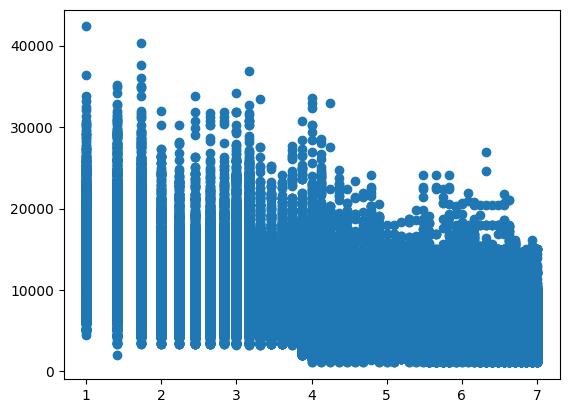

In [281]:
plt.scatter(dfe.days_left,dfe.price)

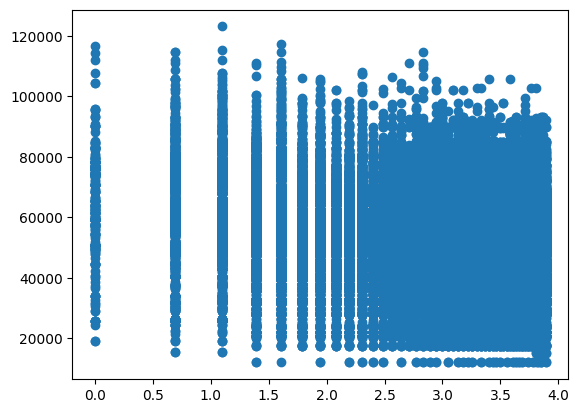

In [284]:
plt.scatter(np.log(dfb.days_left),dfb.price)

In [293]:
dfb_t = dfb[dfb['days_left'] < 10]

In [294]:
dfb_t.corr()['price']

Unnamed: 0    0.107084
duration      0.243022
days_left    -0.178584
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [298]:
dfb.groupby('path')['price'].mean().sort_values(ascending=False)

path
Bangalore Kolkata      58854.693091
Kolkata Bangalore      58681.104437
Bangalore Mumbai       58024.618208
Mumbai Bangalore       57970.544389
Kolkata Mumbai         57422.551724
Mumbai Kolkata         57106.526385
Chennai Kolkata        57078.895872
Kolkata Chennai        56502.775035
Delhi Kolkata          56239.853659
Chennai Mumbai         56223.838086
Mumbai Chennai         55703.326197
Kolkata Delhi          55047.492193
Kolkata Hyderabad      54732.447908
Hyderabad Kolkata      53729.157762
Chennai Bangalore      53113.008692
Chennai Delhi          52443.367242
Bangalore Chennai      52436.915395
Hyderabad Mumbai       52184.424666
Delhi Chennai          52031.778099
Mumbai Hyderabad       51593.643678
Chennai Hyderabad      51559.874283
Hyderabad Chennai      51132.155288
Bangalore Hyderabad    50395.796948
Hyderabad Bangalore    50358.290706
Delhi Bangalore        48576.027921
Bangalore Delhi        48144.337108
Delhi Hyderabad        44457.376775
Delhi Mumbai           

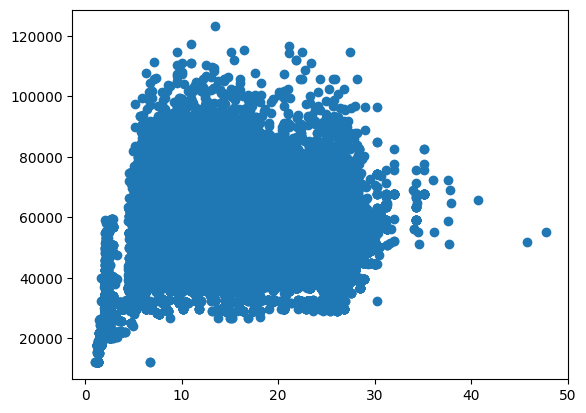

In [329]:
plt.scatter(dfb.duration,dfb.price)

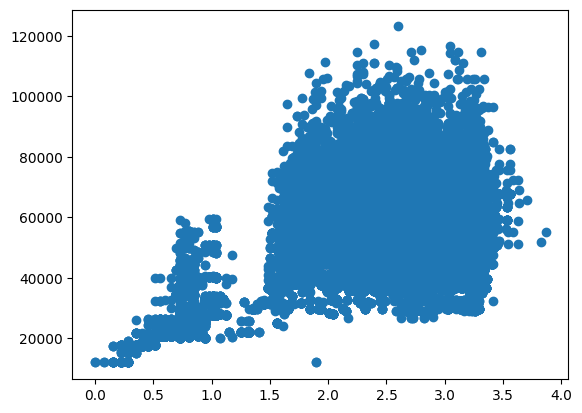

In [306]:
plt.scatter(np.log(dfb.duration),dfb.price)

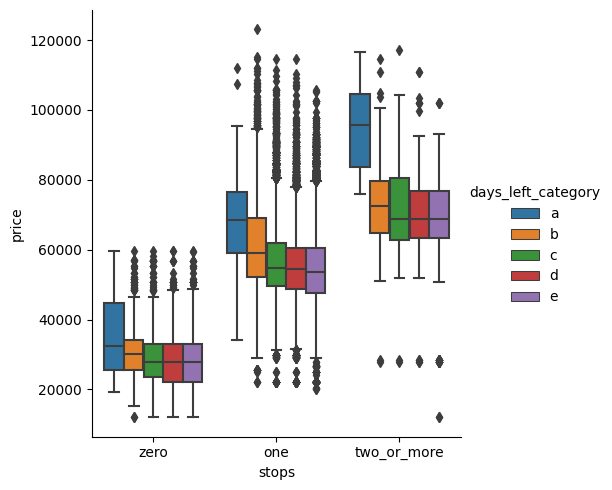

In [366]:
sns.catplot(x='stops',y='price',data=dfb, hue = 'days_left_category', kind ='box')

<AxesSubplot:xlabel='stops', ylabel='duration'>

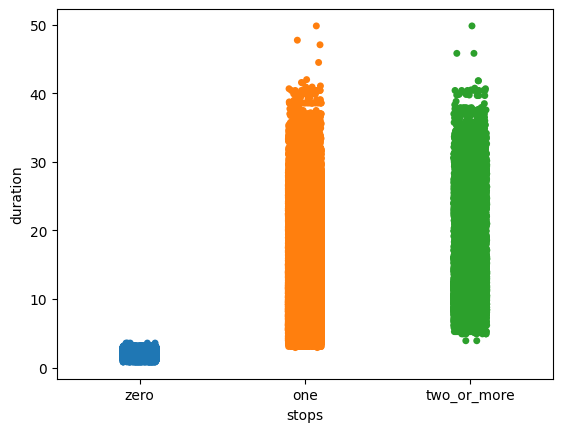

In [547]:
sns.stripplot(x='stops',y='duration',data=dfe)

# Economy

In [558]:
dfe.corr()['price']

duration      0.288379
days_left    -0.559551
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [562]:
dfe[dfe['stops']=='zero'].corr()['price']

duration      0.393612
days_left    -0.604545
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [569]:
dfe[dfe['stops']=='one'].corr()['price']

duration      0.164080
days_left    -0.593643
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [561]:
dfe[dfe['stops']=='two_or_more'].corr()['price']

duration      0.237559
days_left    -0.590846
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [563]:
dfe[(dfe['stops']=='two_or_more')|(dfe['stops']=='one')].corr()['price']

duration      0.183158
days_left    -0.588437
price         1.000000
class_code         NaN
Name: price, dtype: float64

# Business

In [565]:
dfb.corr()['price']

duration      0.242731
days_left    -0.091289
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [564]:
dfb[dfb['stops']=='zero'].corr()['price']

duration      0.551417
days_left    -0.106118
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [567]:
dfb[dfb['stops']=='one'].corr()['price']

duration     -0.085423
days_left    -0.113634
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [568]:
dfb[dfb['stops']=='two_or_more'].corr()['price']

duration     -0.200018
days_left    -0.139670
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [572]:
dfb[(dfb['stops']=='two_or_more')|(dfb['stops']=='one')].corr()['price']

duration     -0.087485
days_left    -0.115260
price         1.000000
class_code         NaN
Name: price, dtype: float64

<AxesSubplot:xlabel='stops', ylabel='price'>

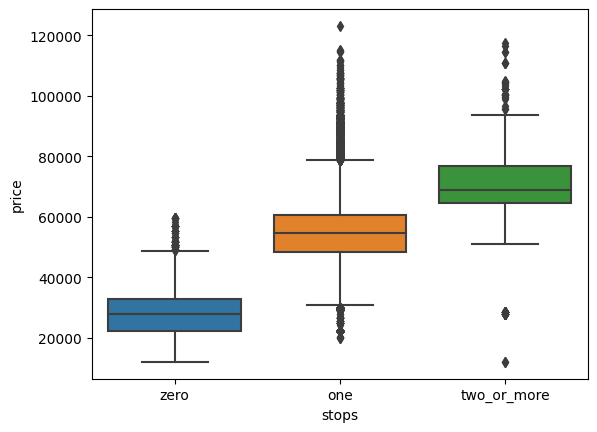

In [370]:
sns.boxplot(x='stops',y='price',data=dfb)

<AxesSubplot:xlabel='stops', ylabel='price'>

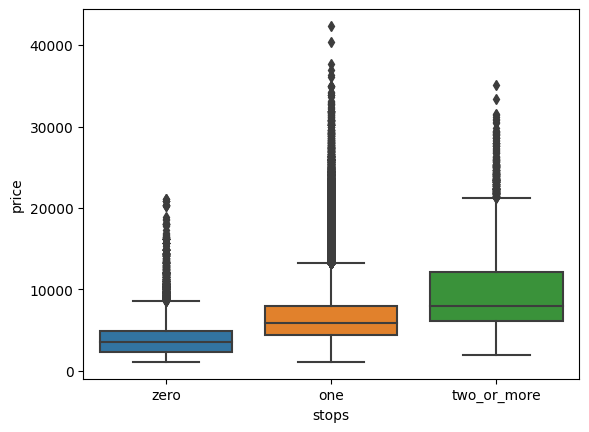

In [468]:
sns.boxplot(x='stops',y='price',data=dfe)

<AxesSubplot:xlabel='class', ylabel='price'>

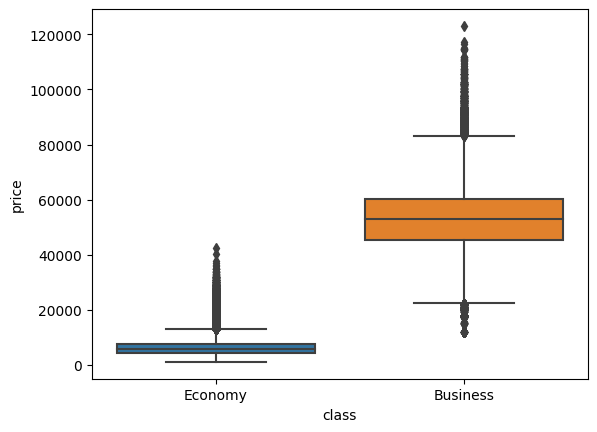

In [470]:
sns.boxplot(x='class',y='price',data=df)

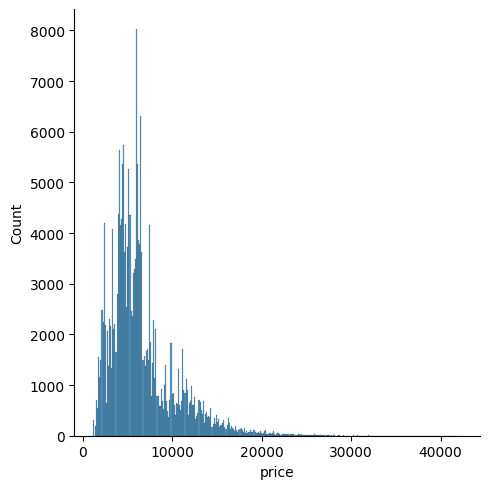

In [471]:
sns.displot(dfe['price'])

In [445]:
dfb_low = dfb[(dfb['stops']=='one')&(dfb['price']<40000)]

In [446]:
from scipy.stats.stats import spearmanr, pearsonr

In [447]:
spearmanr(dfb_low['duration'], dfb_low['price'])[1]

1.3455932401746933e-06

In [448]:
dfb_low.corr(method='spearman')['price']

Unnamed: 0    0.268072
duration      0.059394
days_left    -0.001556
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [321]:
dfb_low.duration.max()

26.83

In [369]:
dfb_high = dfb[(dfb['stops']=='one')&(dfb['price']>30000)&(dfb['price']<80000)]
dfb_high.corr()['price']

Unnamed: 0    0.045077
duration     -0.100827
days_left    -0.078379
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [398]:
dfb_high.duration.max()

3.58

In [376]:
dfb_zero = dfb[(dfb['stops']=='zero')&(dfb['price']<50000)]
dfb_zero.corr()['price']

Unnamed: 0   -0.288902
duration      0.574962
days_left    -0.076639
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [396]:
dfb_zero.duration.max()

3.58

In [382]:
dfb_zero_high = dfb[(dfb['stops']=='zero')&(dfb['price']>50000)]
dfb_zero_high.corr()['price']

Unnamed: 0    0.384722
duration      0.153433
days_left     0.020859
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [383]:
dfb_zero_high.duration.max()

2.83

In [384]:
dfb_two_low = dfb[(dfb['stops']=='two_or_more')&(dfb['price']<50000)]
dfb_two_low.corr()['price']

Unnamed: 0   -0.167822
duration      0.860352
days_left    -0.476450
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [390]:
dfb_two_low.duration.max()

7.67

In [391]:
dfb_two = dfb[(dfb['stops']=='two_or_more')&(dfb['price']>50000)&(dfb['price']<95000)]
dfb_two.corr()['price']

Unnamed: 0   -0.542856
duration     -0.407278
days_left    -0.061675
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [393]:
dfb_two.duration.max()

45.83

In [395]:
dfb_two_high = dfb[(dfb['stops']=='two_or_more')&(dfb['price']>95000)]
dfb_two_high.corr()['price']

Unnamed: 0   -0.016838
duration      0.076218
days_left    -0.039948
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [462]:
dfb[dfb['price'] < 40000].corr()['price']

Unnamed: 0    0.123229
duration      0.242731
days_left    -0.091289
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [478]:
dfe[dfe['price'] <  5000].corr()['price']

Unnamed: 0   -0.000475
duration      0.387335
days_left    -0.117507
price         1.000000
class_code         NaN
Name: price, dtype: float64

In [394]:
dfb_two_high.duration.max()

29.0

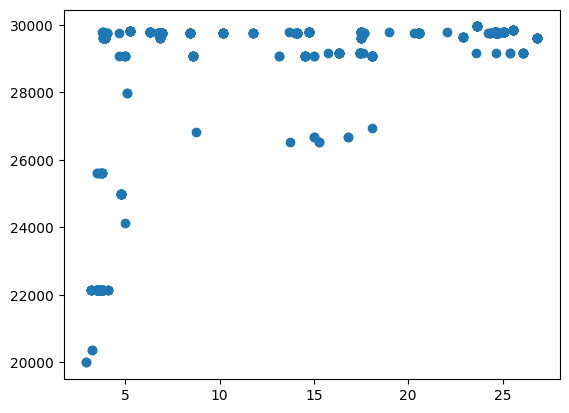

In [336]:
plt.scatter(dfb_low.duration,dfb_low.price)

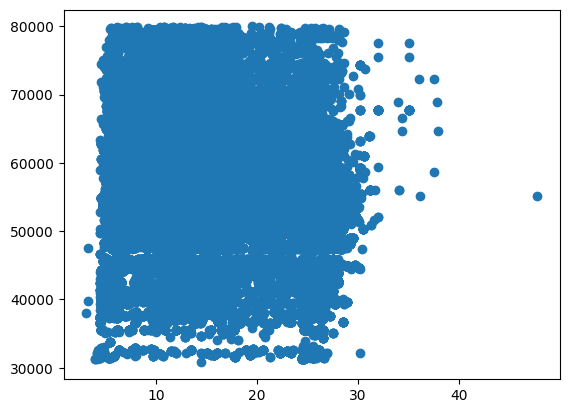

In [340]:
plt.scatter(dfb_high.duration,dfb_high.price)

In [333]:
dfb_high.sort_values(by='duration')

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code
215918,215918,Vistara,UK-705,Delhi,Early_Morning,one,Morning,Kolkata,Business,3.08,3,38056,a,b,Delhi Kolkata,b,1
215920,215920,Vistara,UK-707,Delhi,Evening,one,Night,Kolkata,Business,3.25,3,39736,a,b,Delhi Kolkata,b,1
215868,215868,Vistara,UK-707,Delhi,Evening,one,Night,Kolkata,Business,3.25,2,47576,a,b,Delhi Kolkata,b,1
237771,237771,Air_India,AI-669,Mumbai,Morning,one,Afternoon,Kolkata,Business,4.00,47,31292,a,e,Mumbai Kolkata,b,1
237609,237609,Air_India,AI-669,Mumbai,Morning,one,Afternoon,Kolkata,Business,4.00,45,31292,a,e,Mumbai Kolkata,b,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234485,234485,Vistara,UK-653,Mumbai,Early_Morning,one,Evening,Kolkata,Business,37.58,6,72338,d,c,Mumbai Kolkata,b,1
234387,234387,Vistara,UK-653,Mumbai,Early_Morning,one,Evening,Kolkata,Business,37.58,5,58708,d,c,Mumbai Kolkata,b,1
295953,295953,Vistara,UK-832,Chennai,Early_Morning,one,Night,Kolkata,Business,37.83,2,68963,d,b,Chennai Kolkata,c,1
283030,283030,Vistara,UK-860,Hyderabad,Early_Morning,one,Night,Kolkata,Business,37.92,2,64733,d,b,Hyderabad Kolkata,b,1


In [302]:
dfb[(dfb['path_group']=='c')]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code
229990,229990,Air_India,AI-619,Mumbai,Night,one,Afternoon,Bangalore,Business,18.08,1,34134,c,a,Mumbai Bangalore,c,1
229991,229991,Vistara,UK-865,Mumbai,Evening,zero,Night,Bangalore,Business,1.75,1,39948,a,a,Mumbai Bangalore,c,1
229992,229992,Air_India,AI-867,Mumbai,Night,one,Morning,Bangalore,Business,11.42,1,59189,b,a,Mumbai Bangalore,c,1
229993,229993,Air_India,AI-867,Mumbai,Night,one,Afternoon,Bangalore,Business,15.00,1,59189,c,a,Mumbai Bangalore,c,1
229994,229994,Air_India,AI-867,Mumbai,Night,one,Evening,Bangalore,Business,18.75,1,59189,c,a,Mumbai Bangalore,c,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298056,298056,Vistara,UK-832,Chennai,Early_Morning,one,Evening,Kolkata,Business,12.50,49,57057,b,e,Chennai Kolkata,c,1
298057,298057,Vistara,UK-838,Chennai,Night,one,Evening,Kolkata,Business,22.50,49,57057,c,e,Chennai Kolkata,c,1
298058,298058,Vistara,UK-834,Chennai,Evening,one,Evening,Kolkata,Business,26.17,49,57057,d,e,Chennai Kolkata,c,1
298059,298059,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.25,49,67137,b,e,Chennai Kolkata,c,1


In [271]:
dfe.corr(method='spearman')

,Unnamed: 0,duration,days_left,price,class_code
Unnamed: 0,1.000000,0.080022,0.043247,0.032084,NaN
duration,0.080022,1.000000,-0.033827,0.357844,NaN
days_left,0.043247,-0.033827,1.000000,-0.525426,NaN
price,0.032084,0.357844,-0.525426,1.000000,NaN
class_code,NaN,NaN,NaN,NaN,NaN


In [270]:
df.corr(method='spearman')

,duration,days_left,price,class_code
duration,1.000000,-0.033094,0.318841,0.163679
days_left,-0.033094,1.000000,-0.267019,-0.013120
price,0.318841,-0.267019,1.000000,0.801583
class_code,0.163679,-0.013120,0.801583,1.000000


In [268]:
dfe.shape

(206666, 17)

In [269]:
dfb.shape

(93487, 17)

<AxesSubplot:xlabel='duration_category', ylabel='count'>

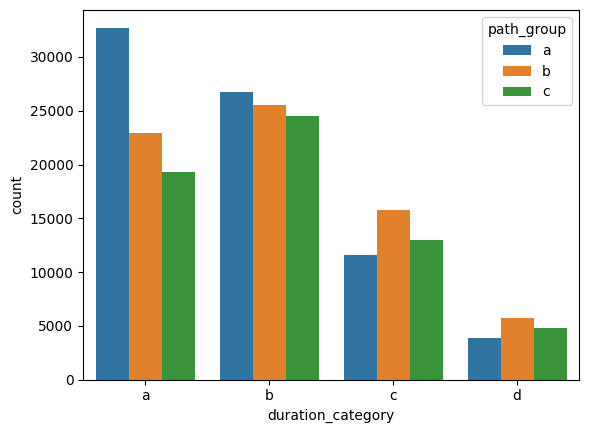

In [256]:
sns.countplot(x='duration_category',hue='path_group',data=dfe)

In [205]:
ss.groupby('time')['price'].mean().sort_values(ascending=False)

time
Early_Morning Afternoon        9924.500000
Afternoon Night                9552.000000
Evening Late_Night             7688.000000
Morning Afternoon              7382.170732
Afternoon Evening              7113.029412
Evening Night                  7035.235294
Late_Night Late_Night          6989.000000
Night Late_Night               6901.535714
Early_Morning Morning          6791.057143
Evening Evening                6653.363636
Night Night                    6517.906250
Early_Morning Early_Morning    6484.142857
Afternoon Afternoon            6420.923077
Morning Morning                6417.157895
Late_Night Early_Morning       5954.500000
Name: price, dtype: float64

In [206]:
ss[ss['time']=='Afternoon Night']

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code,time
12127,GO_FIRST,G8-7549,Delhi,Afternoon,one,Night,Bangalore,Economy,4.75,13,7424,a,d,Delhi Bangalore,a,0,Afternoon Night
86334,GO_FIRST,G8-285,Bangalore,Afternoon,one,Night,Delhi,Economy,4.58,13,11680,a,d,Bangalore Delhi,a,0,Afternoon Night


<AxesSubplot:xlabel='stops', ylabel='price'>

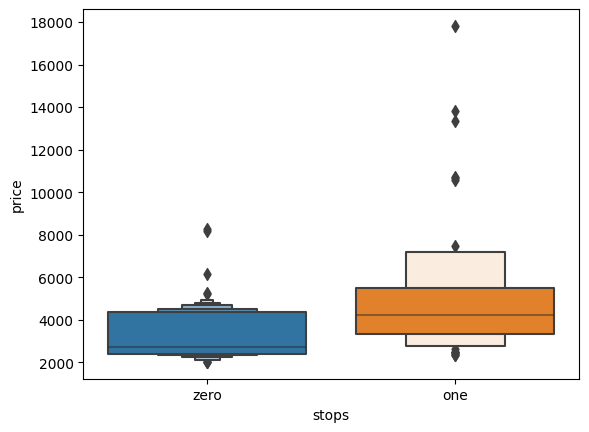

In [186]:
sns.boxenplot(x='stops', y='price',data=ss)

## Airline

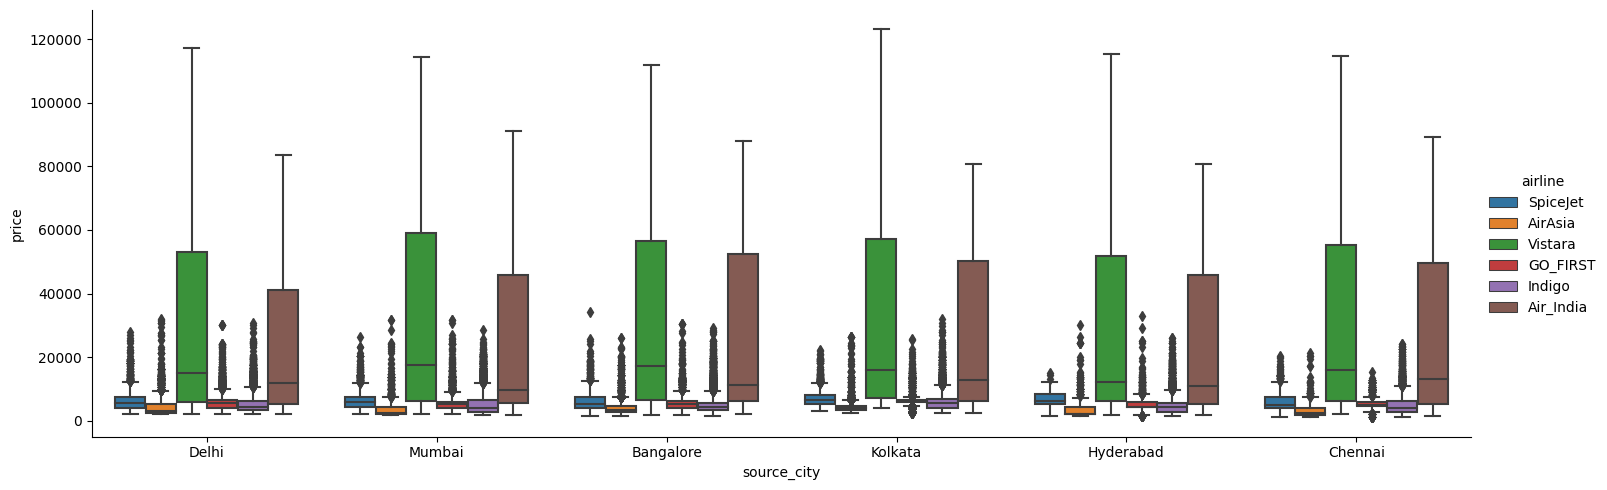

In [110]:
sns.catplot(x='source_city', y='price', data=df, hue='airline', kind='box', aspect=3)

<AxesSubplot:xlabel='airline', ylabel='price'>

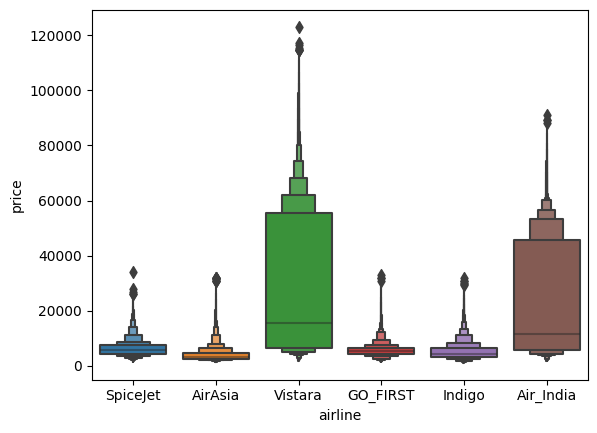

In [111]:
sns.boxenplot(x='airline',y='price',data=df)

## Days Left

In [27]:
days_left_mean = df.groupby('days_left').mean()['price']

In [28]:
days_left_median = df.groupby('days_left').median()['price']

In [29]:
df.corr()

,Unnamed: 0,duration,days_left,price
Unnamed: 0,1.000000,0.159007,0.014638,0.761177
duration,0.159007,1.000000,-0.039157,0.204222
days_left,0.014638,-0.039157,1.000000,-0.091949
price,0.761177,0.204222,-0.091949,1.000000


Text(0.5, 1.0, 'days_left price median')

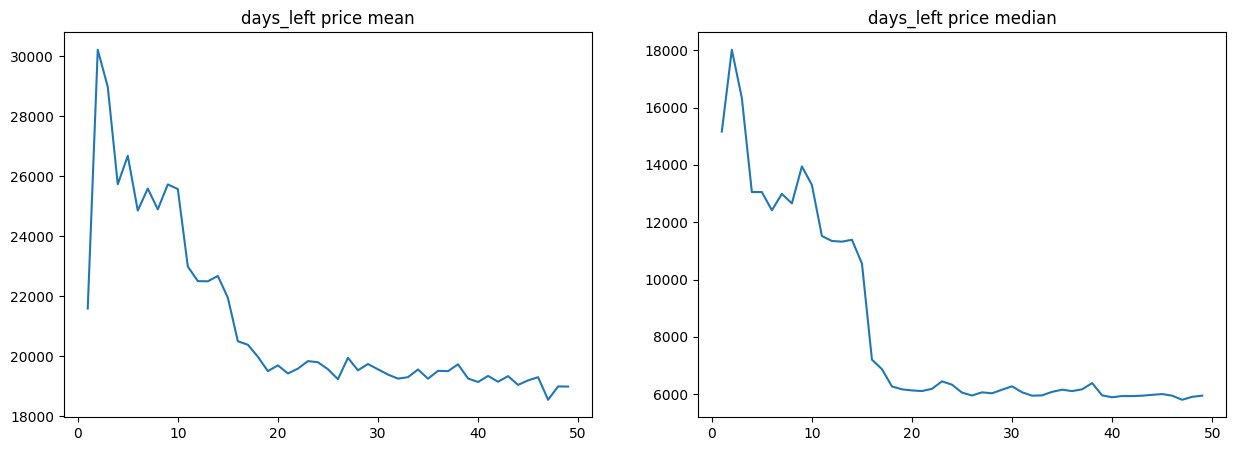

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(days_left_mean)
plt.title('days_left price mean')
plt.subplot(1,2,2)
plt.plot(days_left_median)
plt.title('days_left price median')

In [545]:
dfe = df[df['class']=='Economy']
dfb = df[df['class']=='Business']

Text(0.5, 1.0, 'business_days_left price mean')

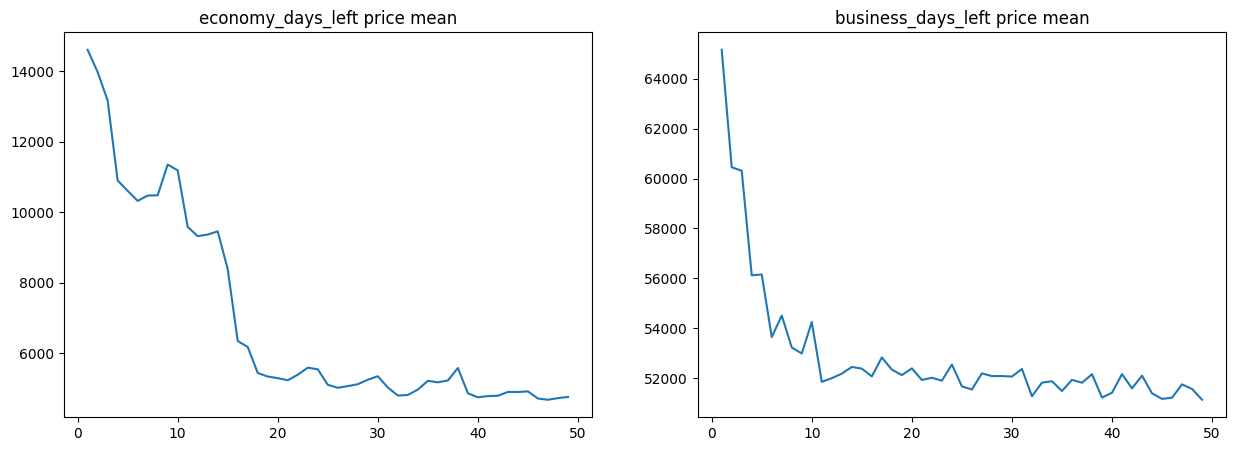

In [33]:
dfe_days_left_mean = dfe.groupby('days_left').mean()['price']
dfb_days_left_mean = dfb.groupby('days_left').mean()['price']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(dfe_days_left_mean)
plt.title('economy_days_left price mean')
plt.subplot(1,2,2)
plt.plot(dfb_days_left_mean)
plt.title('business_days_left price mean')

<AxesSubplot:xlabel='days_left', ylabel='Density'>

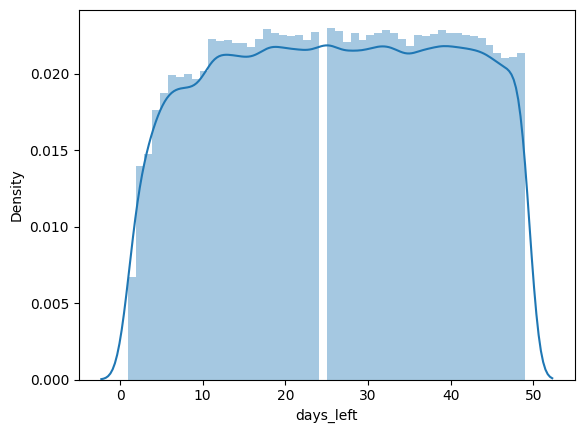

In [34]:
sns.distplot(df.days_left)

### Days Left Categorization 

In [35]:
days_left_ranges = generate.generate_numerical_ranges(df.days_left, [2,5,10,18])

In [36]:
days_left_dict = categorize.categorize_numerical_variable(df.days_left, days_left_ranges)

In [37]:
df['days_left_category'] = df['days_left'].map(days_left_dict)

<AxesSubplot:xlabel='price', ylabel='Density'>

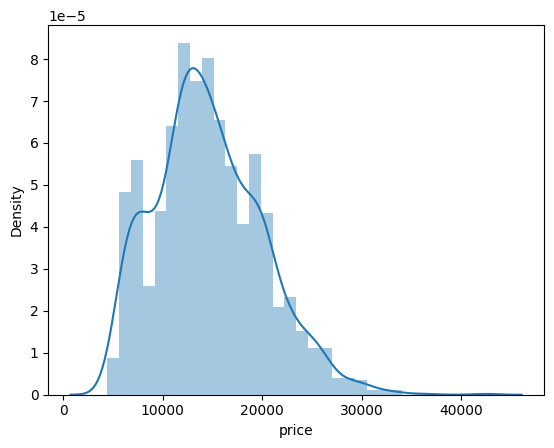

In [38]:
sns.distplot(dfe[dfe['days_left'] == 1]['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

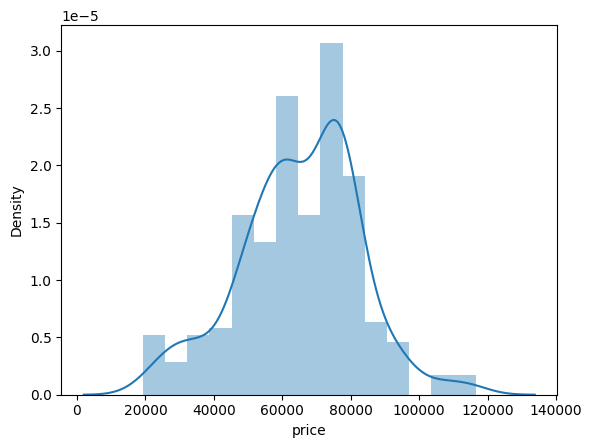

In [39]:
sns.distplot(dfb[dfb['days_left'] == 1]['price'])

In [40]:
df.shape

(300153, 14)

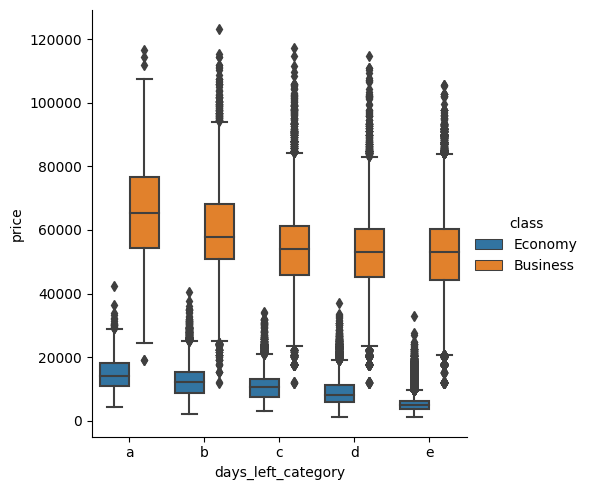

In [41]:
sns.catplot(x='days_left_category',y='price', data=df, hue='class',kind='box')

## Airline

In [46]:
dfvis = df[df['airline'] == 'Vistara']
dfind = df[df['airline'] == 'Air_India']

In [47]:
dfvis[dfvis['class']=='Economy']['price'].sum(), dfvis[dfvis['class']=='Business']['price'].sum()

(525173099, 3361297636)

In [48]:
dfvis[dfvis['class']=='Economy']['price'].mean(), dfvis[dfvis['class']=='Business']['price'].mean()

(7806.943645012636, 55477.027777319316)

In [49]:
dfind[dfind['class']=='Economy']['price'].sum(), dfind[dfind['class']=='Business']['price'].sum()

(351012862, 1550516928)

In [50]:
dfind[dfind['class']=='Economy']['price'].mean(), dfind[dfind['class']=='Business']['price'].mean(), 

(7313.682168604409, 47131.03921211016)

Text(0.5, 1.0, 'Air_India')

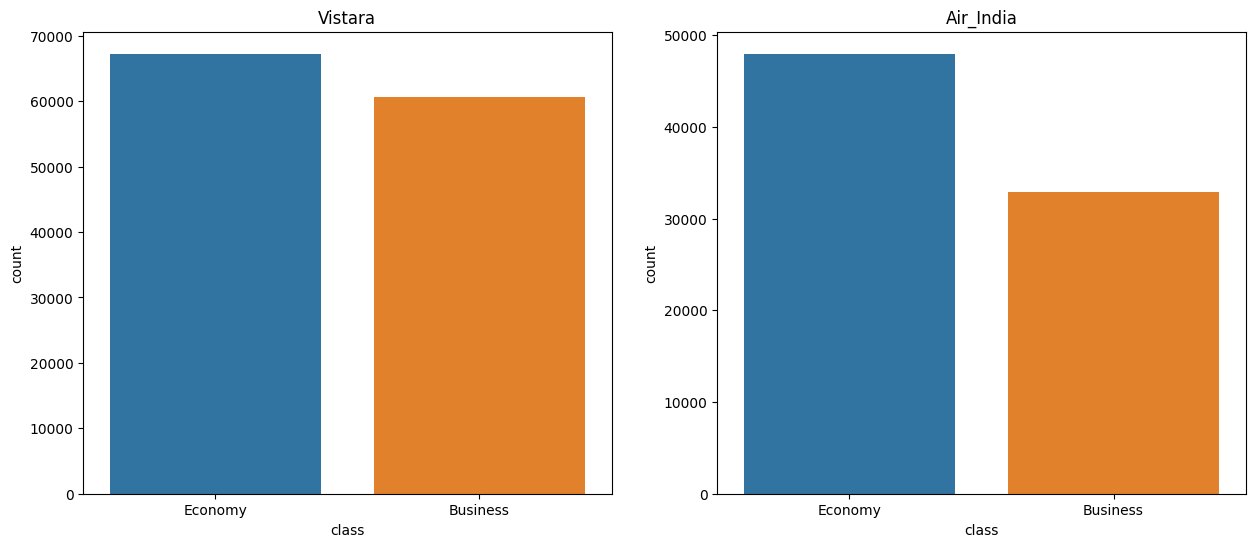

In [51]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='class',data=dfvis)
plt.title('Vistara')
plt.subplot(1,2,2)
sns.countplot(x='class',data=dfind)
plt.title('Air_India')

## Path

In [52]:
df['path'] = df['source_city'] + ' ' + df['destination_city']
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,a,a,Delhi Mumbai
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,a,a,Delhi Mumbai
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,a,a,Delhi Mumbai
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,a,a,Delhi Mumbai
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,a,a,Delhi Mumbai


In [53]:
df.path.value_counts()

Delhi Mumbai           15289
Mumbai Delhi           14809
Delhi Bangalore        14012
Bangalore Delhi        13756
Bangalore Mumbai       12939
Mumbai Bangalore       12885
Mumbai Kolkata         12602
Delhi Kolkata          11934
Kolkata Mumbai         11467
Delhi Chennai          10780
Kolkata Delhi          10506
Mumbai Hyderabad       10470
Mumbai Chennai         10130
Hyderabad Mumbai       10064
Bangalore Kolkata      10028
Kolkata Bangalore       9824
Chennai Delhi           9783
Chennai Mumbai          9338
Delhi Hyderabad         9328
Bangalore Hyderabad     8928
Hyderabad Delhi         8506
Hyderabad Kolkata       7987
Kolkata Hyderabad       7897
Hyderabad Bangalore     7854
Chennai Kolkata         6983
Kolkata Chennai         6653
Chennai Bangalore       6493
Bangalore Chennai       6410
Hyderabad Chennai       6395
Chennai Hyderabad       6103
Name: path, dtype: int64

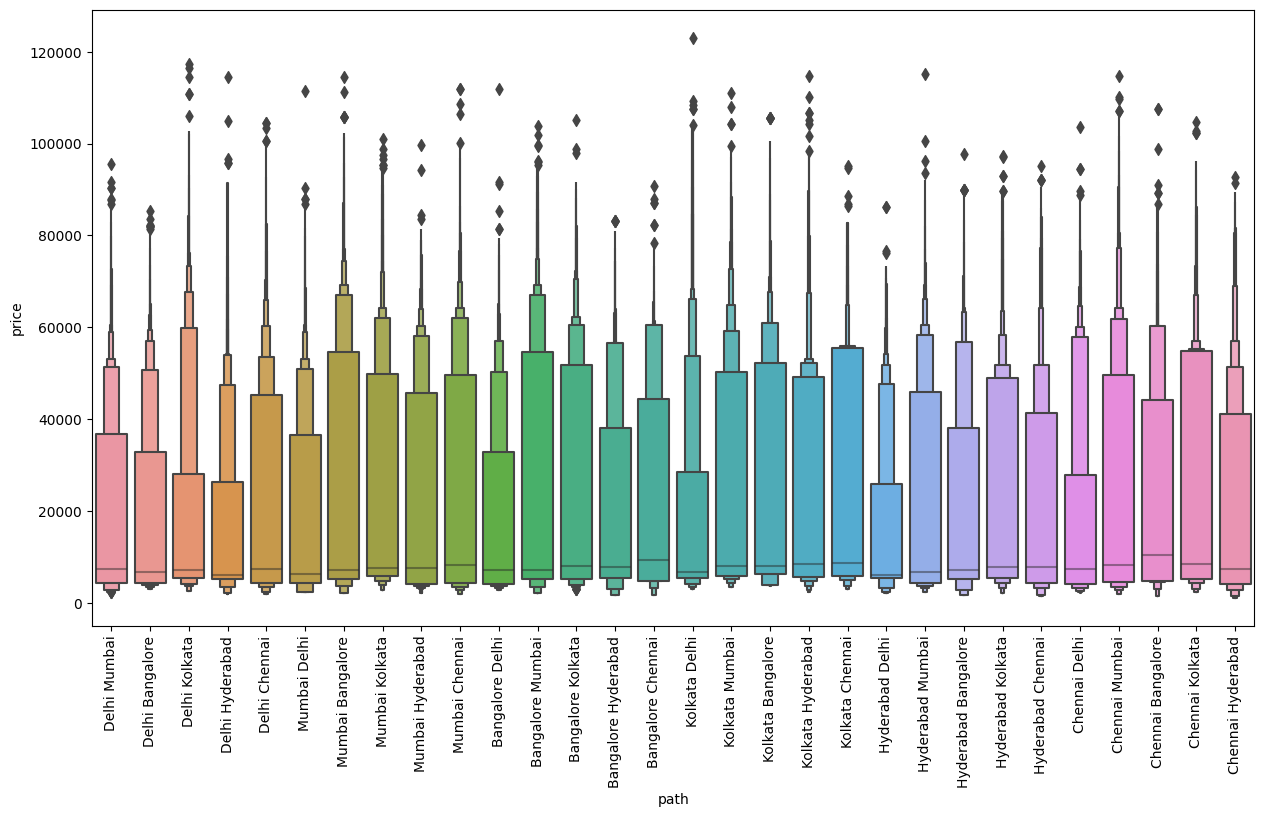

In [54]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='path',y='price', data=df)
plt.xticks(rotation=90);

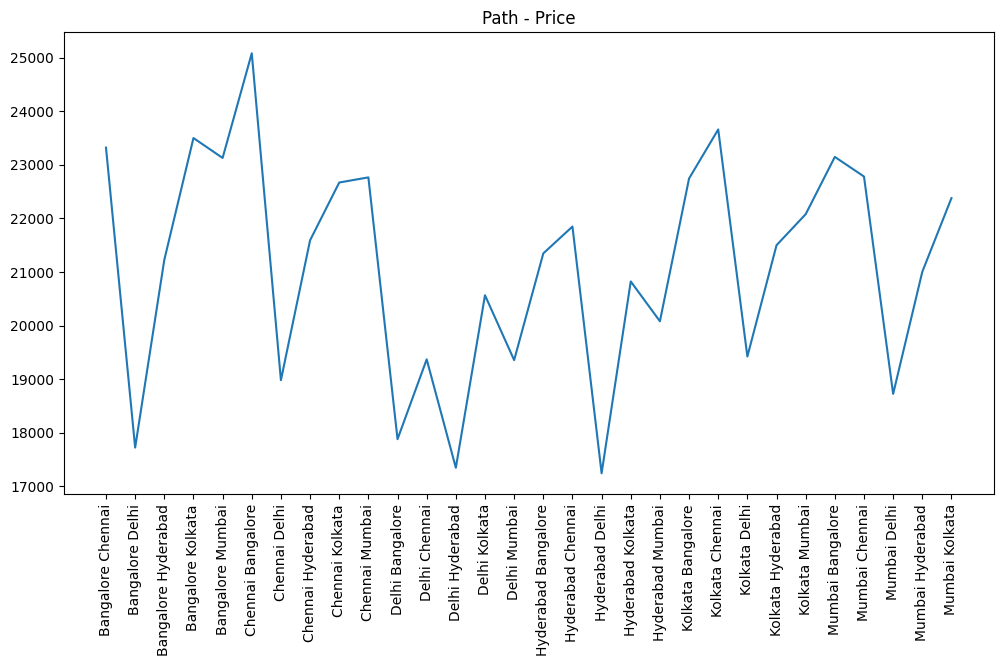

In [55]:
plt.figure(figsize=(12,6));
group = df.groupby('path').mean()['price']
plt.plot(group.index, group.values)
plt.title('Path - Price')
plt.xticks(rotation=90);

## Path Categorization

In [56]:
start = df.groupby('path').mean()['price'].min()
finish = df.groupby('path').mean()['price'].max()

In [57]:
path_ranges = generate.generate_categorical_ranges(3, start, finish)
path_ranges

[range(17243, 19855), range(19855, 22467), range(22467, 37619)]

In [59]:
path_group = df.groupby('path').mean()['price']
path_dict = categorize.categorize_categorical_variable(path_group, path_ranges)

In [60]:
df['path_group'] = df['path'].map(path_dict)

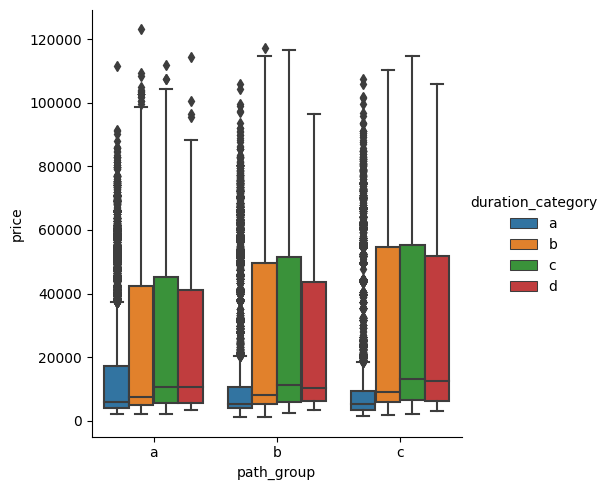

In [61]:
sns.catplot(x='path_group', y='price', data=df, hue='duration_category', kind='box')

<AxesSubplot:xlabel='path_group', ylabel='count'>

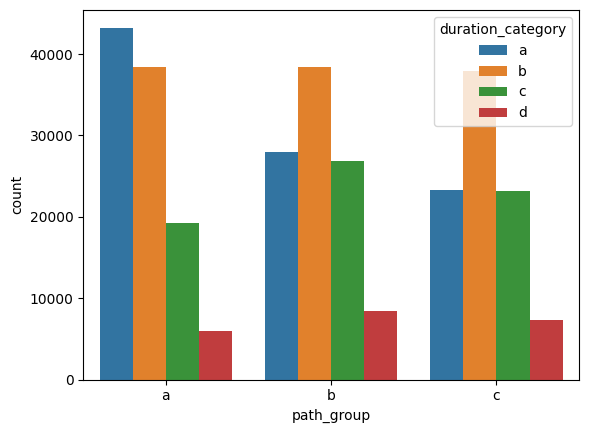

In [62]:
sns.countplot(x='path_group', hue='duration_category',data=df)

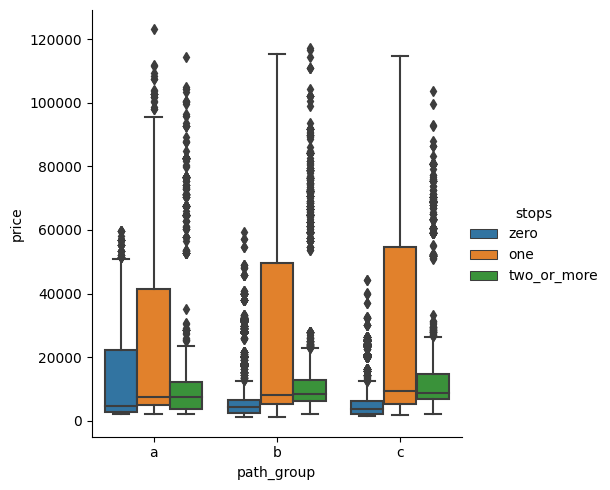

In [63]:
sns.catplot(x='path_group', y='price', data=df, hue='stops', kind='box')

## Stops

## Class

In [65]:
df['class_code'] = df['class'].replace({'Business':1, 'Economy':0})

Text(0.5, 1.0, 'Business')

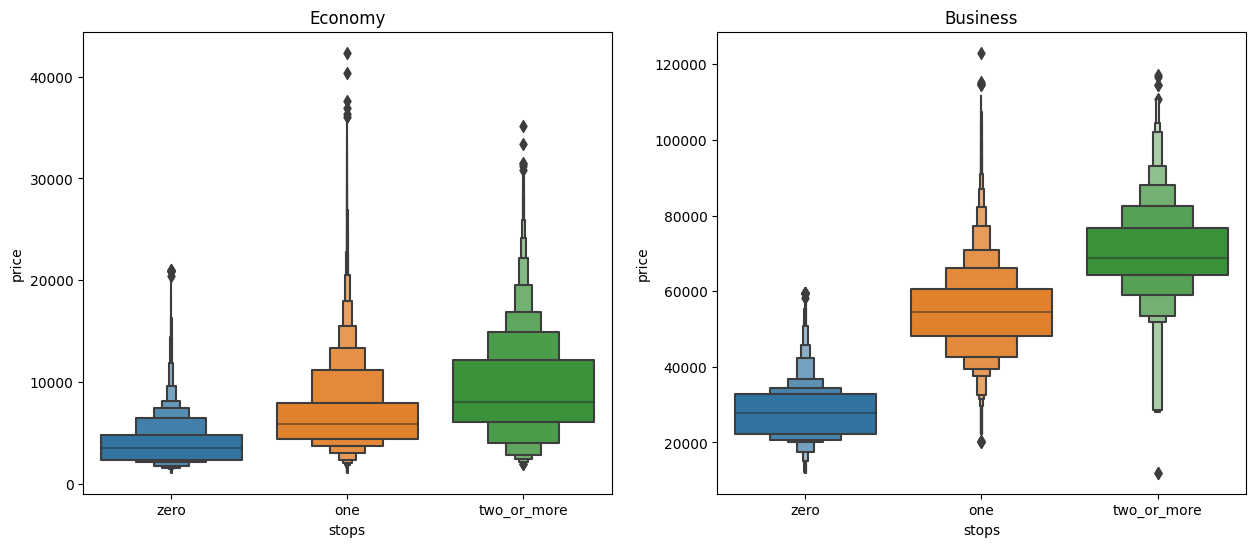

In [83]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxenplot(x='stops',y='price',data=dfe)
plt.title('Economy')
plt.subplot(1,2,2)
sns.boxenplot(x='stops',y='price',data=dfb)
plt.title('Business')

In [67]:
df.corr()['price']

Unnamed: 0    0.761177
duration      0.204222
days_left    -0.091949
price         1.000000
class_code    0.937860
Name: price, dtype: float64

In [68]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,a,a,Delhi Mumbai,a,0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,a,a,Delhi Mumbai,a,0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,a,a,Delhi Mumbai,a,0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,a,a,Delhi Mumbai,a,0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,a,a,Delhi Mumbai,a,0


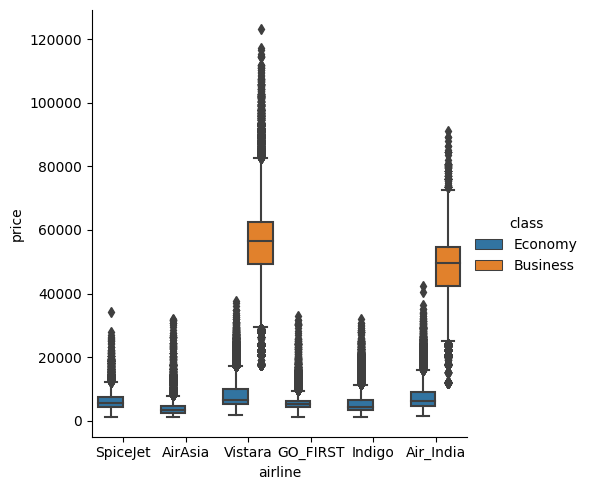

In [69]:
sns.catplot(x='airline',y='price',data=df,hue='class', kind='box')

In [70]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,a,a,Delhi Mumbai,a,0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,a,a,Delhi Mumbai,a,0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,a,a,Delhi Mumbai,a,0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,a,a,Delhi Mumbai,a,0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,a,a,Delhi Mumbai,a,0


In [71]:
df.corr()['price']

Unnamed: 0    0.761177
duration      0.204222
days_left    -0.091949
price         1.000000
class_code    0.937860
Name: price, dtype: float64

<AxesSubplot:xlabel='class', ylabel='count'>

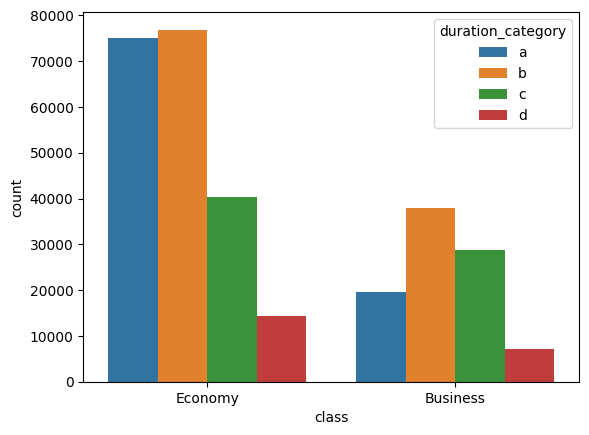

In [72]:
sns.countplot(x='class',hue='duration_category',data=df)

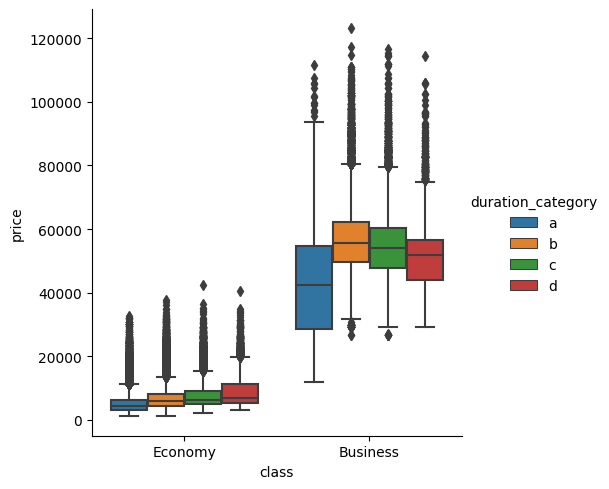

In [73]:
sns.catplot(x='class',y='price',hue='duration_category',data=df, kind='box')

In [74]:
df.flight

0         SG-8709
1         SG-8157
2          I5-764
3          UK-995
4          UK-963
           ...   
300148     UK-822
300149     UK-826
300150     UK-832
300151     UK-828
300152     UK-822
Name: flight, Length: 300153, dtype: object

<AxesSubplot:xlabel='class', ylabel='count'>

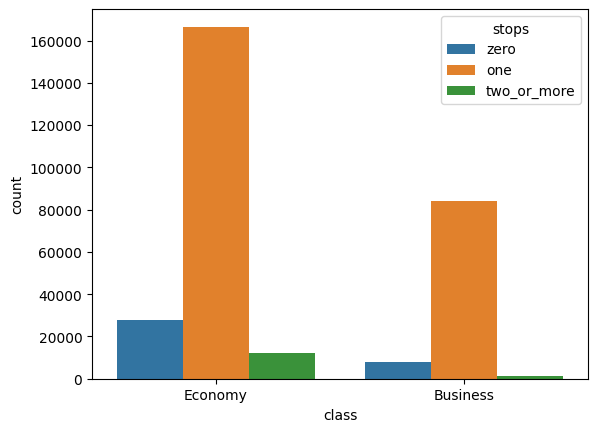

In [75]:
sns.countplot(x='class',hue='stops',data=df)

In [80]:
dfb['stops'].value_counts()

one            84302
zero            8102
two_or_more     1083
Name: stops, dtype: int64

In [86]:
df['time'] = df['departure_time'] + ' ' + df['arrival_time']
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_category,days_left_category,path,path_group,class_code,time
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,a,a,Delhi Mumbai,a,0,Evening Night
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,a,a,Delhi Mumbai,a,0,Early_Morning Morning
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,a,a,Delhi Mumbai,a,0,Early_Morning Early_Morning
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,a,a,Delhi Mumbai,a,0,Morning Afternoon
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,a,a,Delhi Mumbai,a,0,Morning Morning


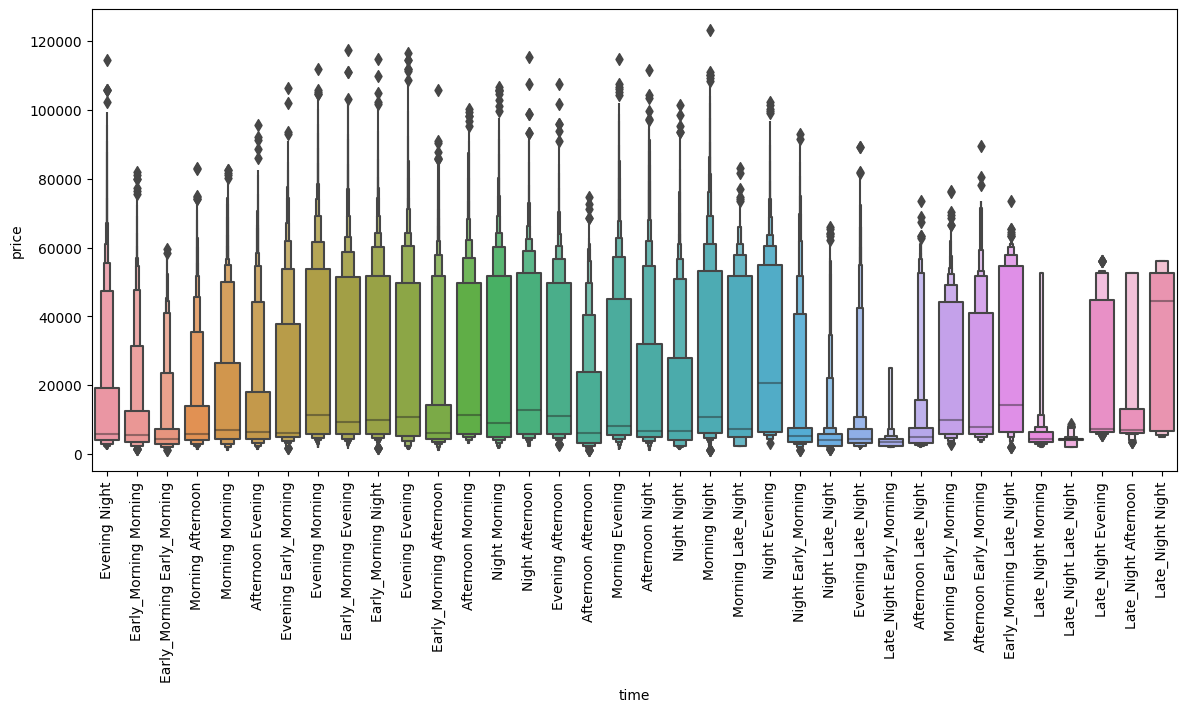

In [87]:
plt.figure(figsize=(14,6))
sns.boxenplot(x='time',y='price',data=df)
plt.xticks(rotation=90);

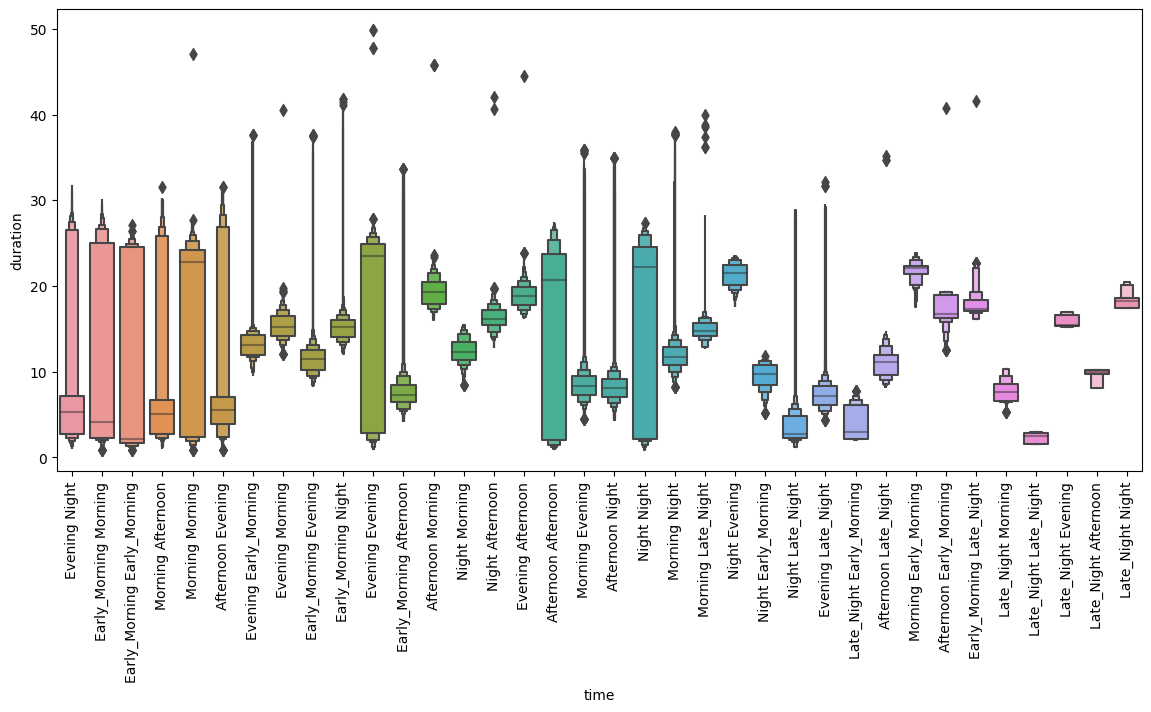

In [88]:
plt.figure(figsize=(14,6))
sns.boxenplot(x='time',y='duration',data=df)
plt.xticks(rotation=90);

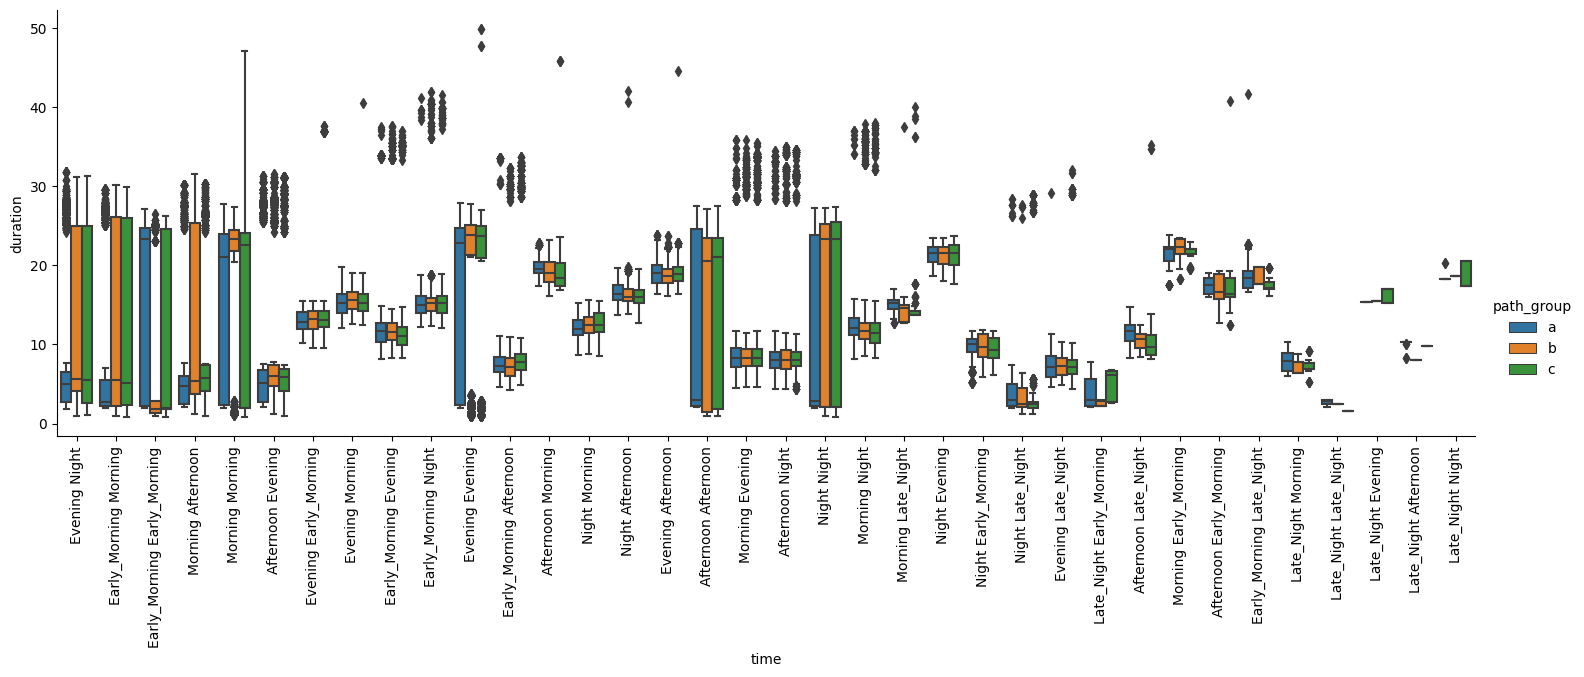

In [89]:
sns.catplot(x='time',y='duration', hue='path_group',data=df,kind='box', aspect=3)
plt.xticks(rotation=90);

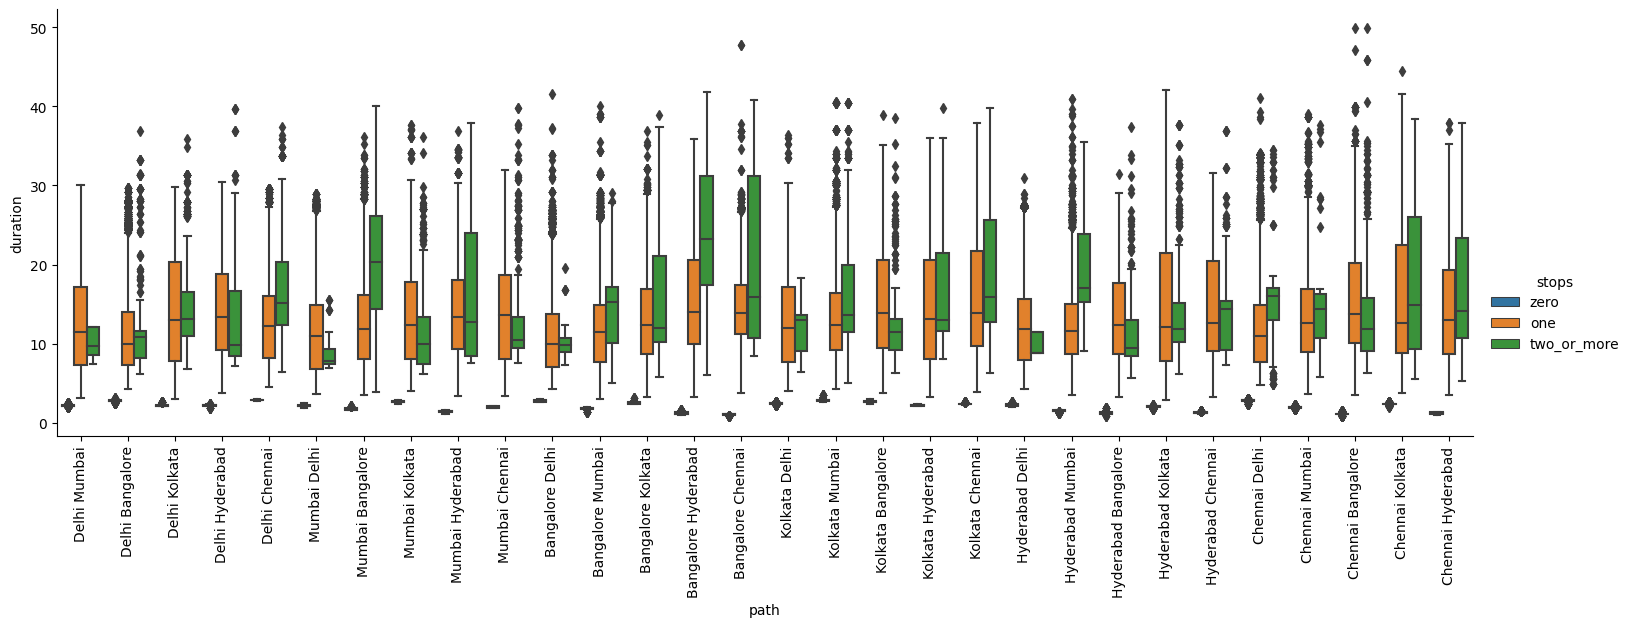

In [90]:
sns.catplot(x='path',y='duration',hue='stops',data=df,kind='box',aspect=3)
plt.xticks(rotation=90);

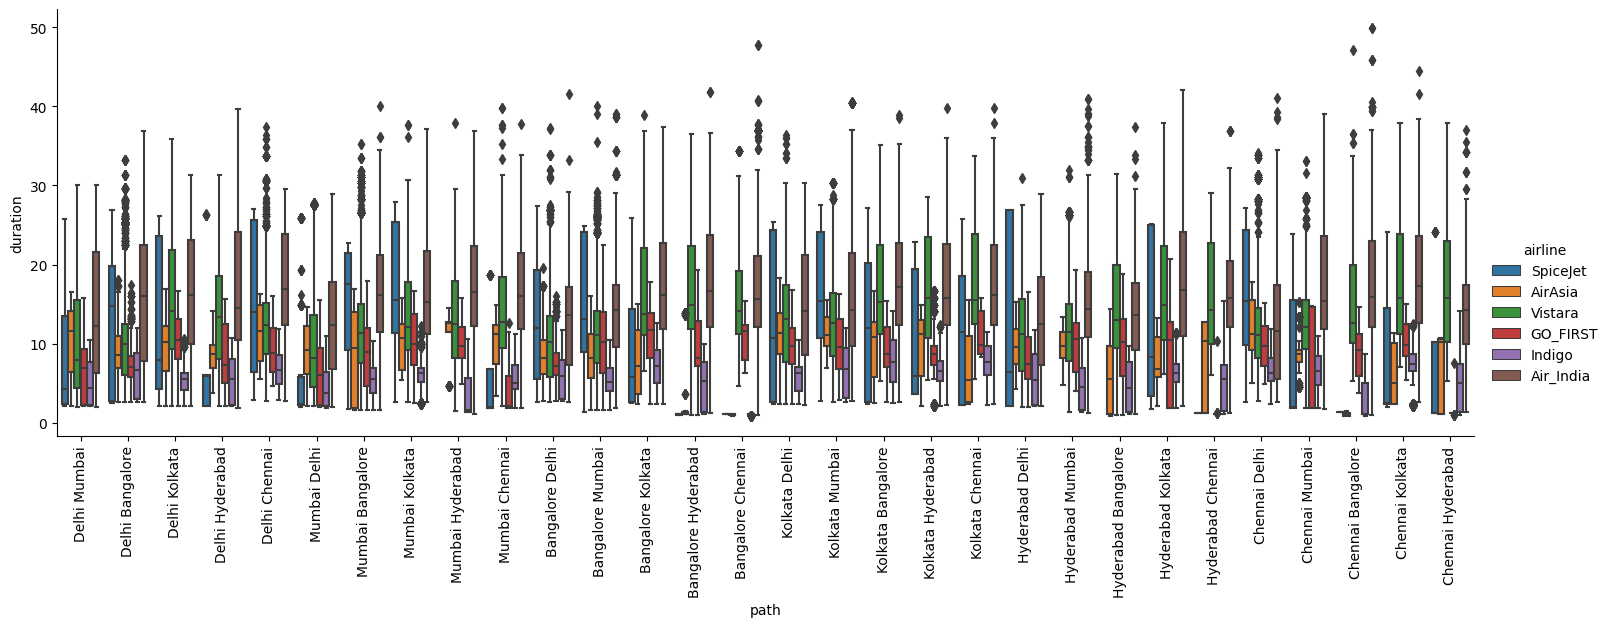

In [91]:
sns.catplot(x='path',y='duration',hue='airline',data=df,kind='box',aspect=3)
plt.xticks(rotation=90);

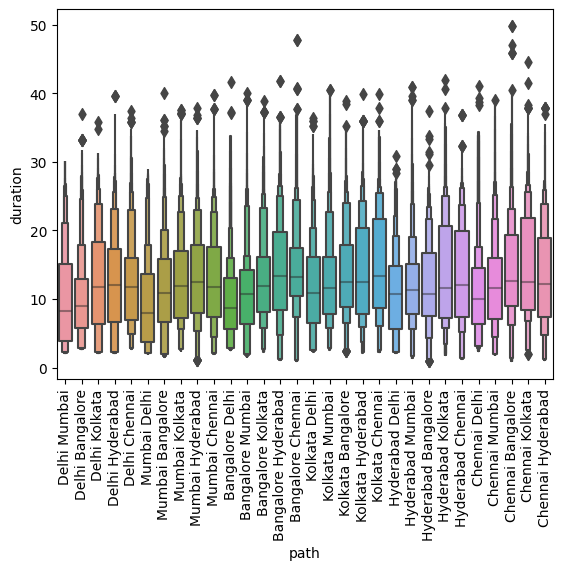

In [92]:
sns.boxenplot(x='path',y='duration',data=df)
plt.xticks(rotation=90);